In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt
from sklearn.metrics import r2_score

%matplotlib inline
import warnings

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')



In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [3]:
df.drop('car_ID',inplace=True,axis=1)

In [4]:
df.describe()

symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [6]:
df.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
categorical = df.select_dtypes(include='object')
cate = categorical.columns
len(cate)

10

In [8]:
numerical = df.select_dtypes(exclude='object')
col = numerical.columns
col = col.drop('symboling')

### Continuous Values

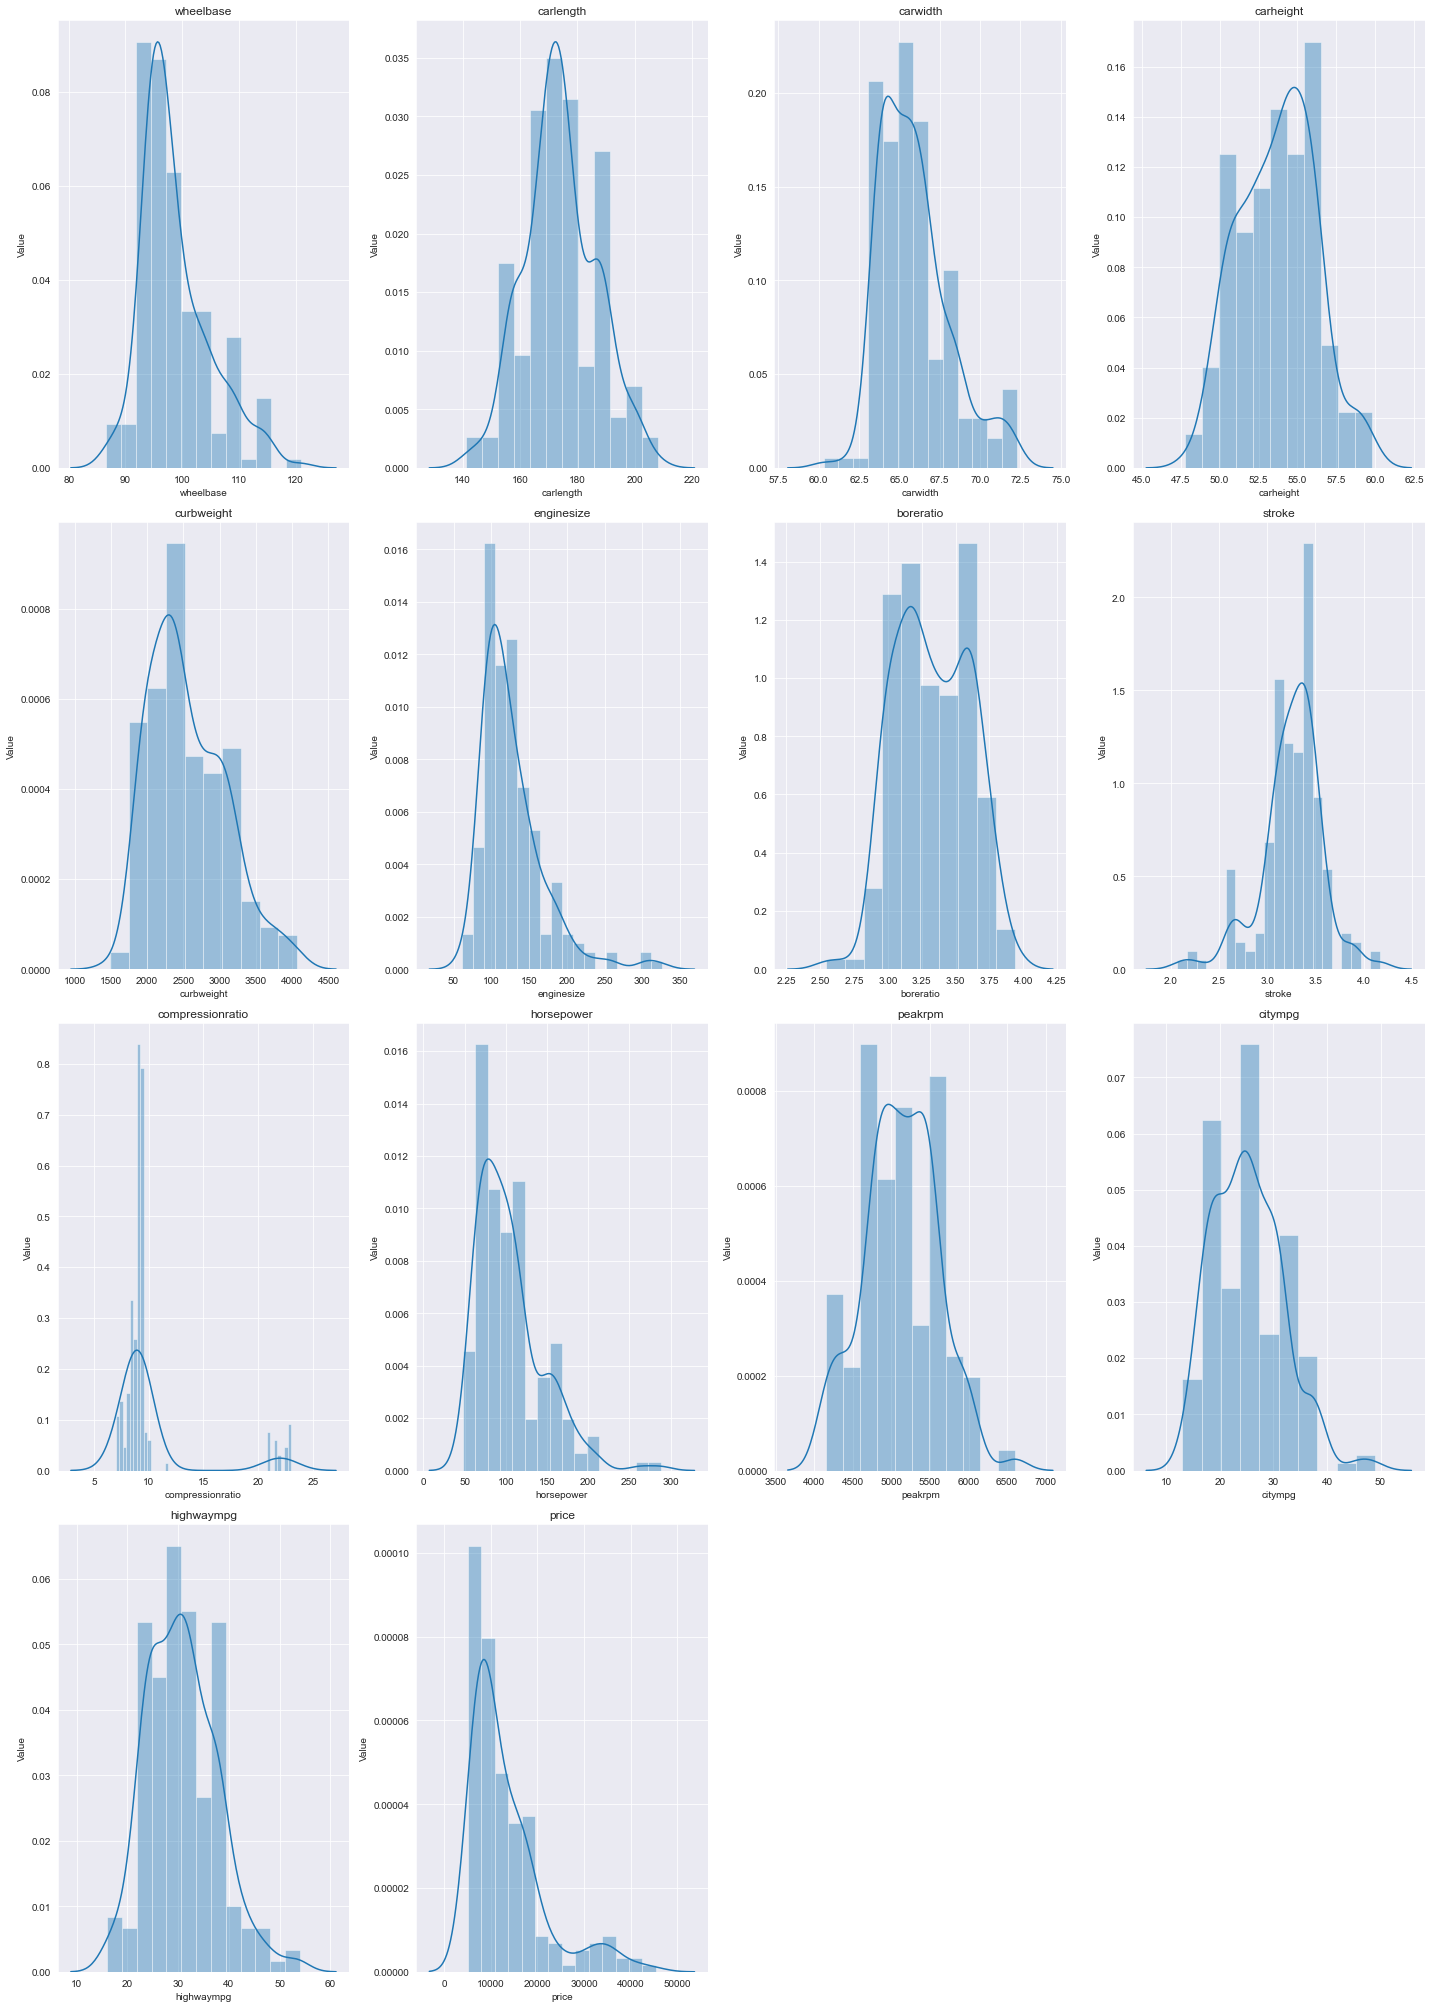

In [9]:
def dist(x,fig):
    plt.subplot(4,4,fig)
    sns.distplot(df[x])
    plt.title(x)
    plt.ylabel('Value')
    plt.xlabel(x)
plt.figure(figsize=(20,28))

for n,i in enumerate(col):
    dist(i,n+1)
plt.tight_layout()

- 1.horsepower,compression ratio,wheelbase and enginesize are rightly skewed.
- 2.stroke is leftly skewed.

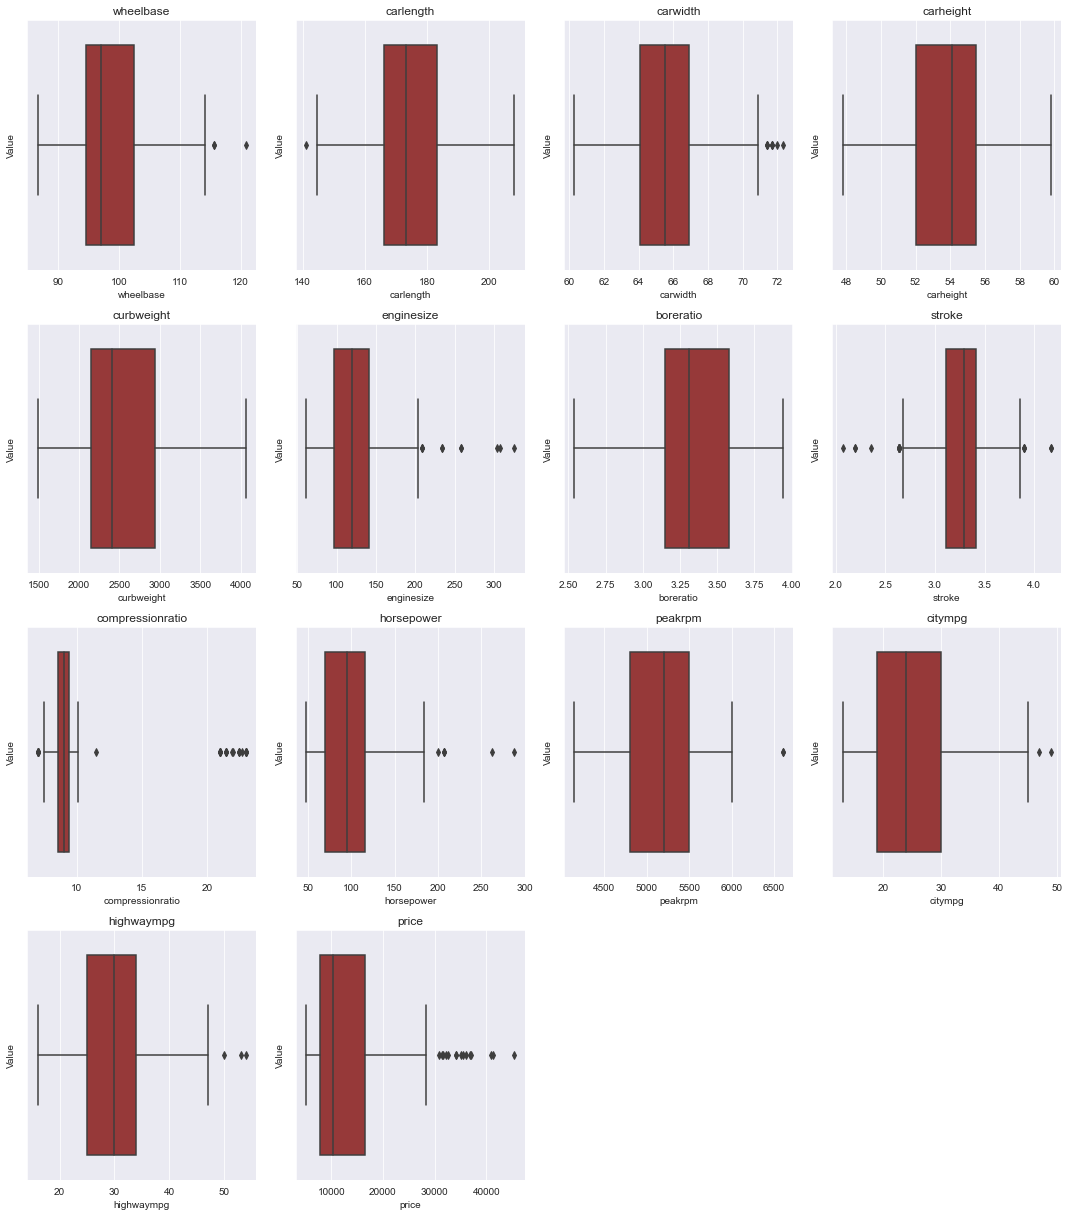

In [10]:
def box(x,fig):
    plt.subplot(4,4,fig)
    sns.boxplot(df[x],color='brown')
    plt.title(x)
    plt.ylabel('Value')
    plt.xlabel(x)
plt.figure(figsize=(15,17))

for n,i in enumerate(col):
    box(i,n+1)
plt.tight_layout()

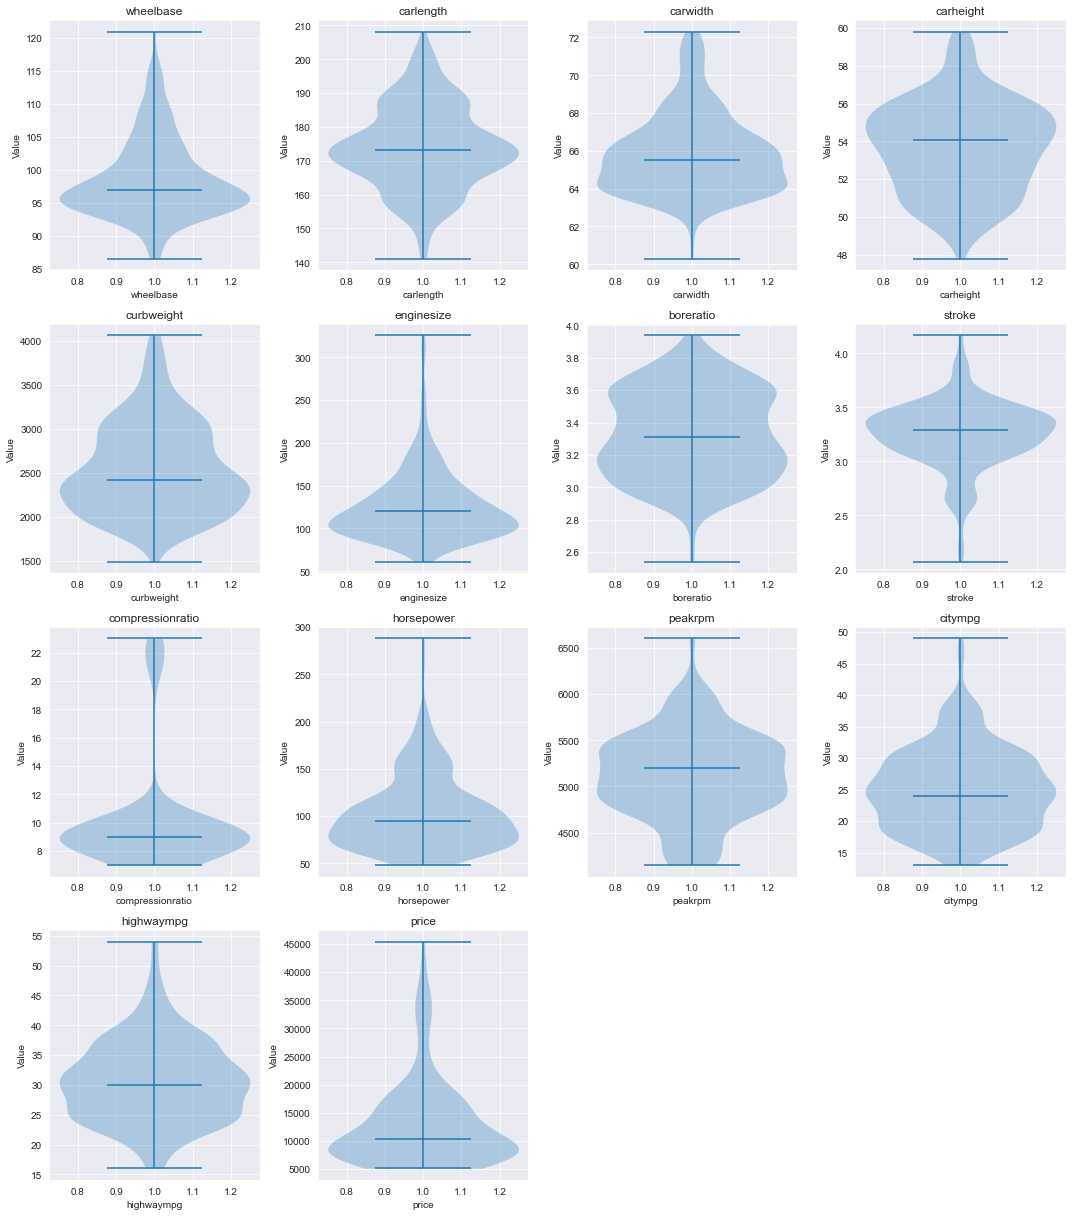

In [11]:
def violin(x,fig):
    plt.subplot(4,4,fig)
    plt.violinplot(df[x],showmedians=True)
    plt.title(x)
    plt.ylabel('Value')
    plt.xlabel(x)
plt.figure(figsize=(15,17))

for n,i in enumerate(col):
    violin(i,n+1)
plt.tight_layout()

### Categorical

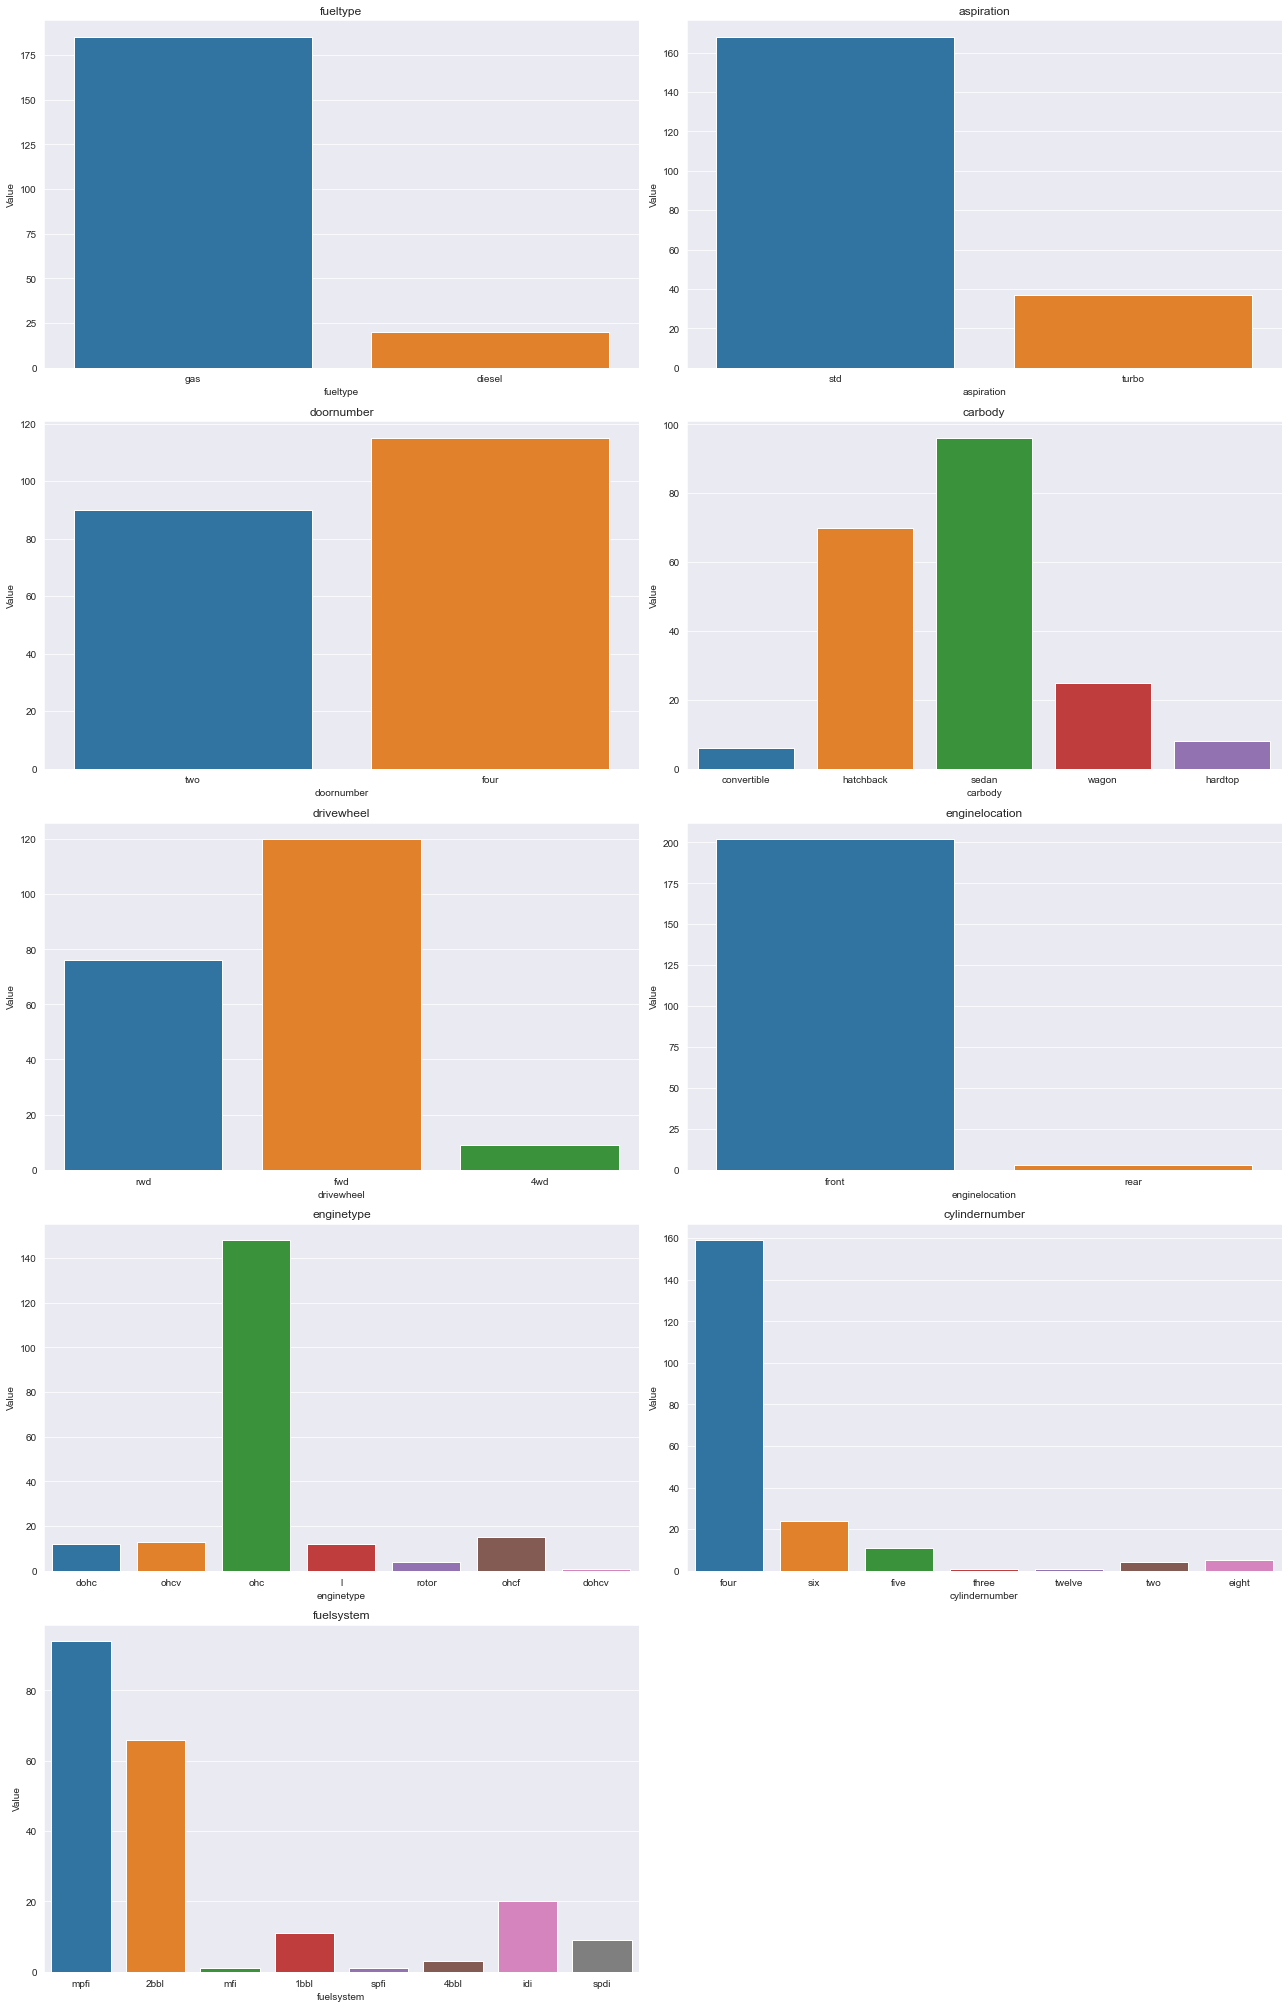

In [12]:
def count(x,fig):
    plt.subplot(5,2,fig)
    sns.countplot(df[x])
    plt.title(x)
    plt.ylabel('Value')
    plt.xlabel(x)
plt.figure(figsize=(18,28))

for n,i in enumerate(cate[1:]):
    count(i,n+1)
plt.tight_layout()

- mostly gas fueltype is used in cars.
- Mostly cars  is of standard aspiration.
- mostly cars are sedan and hatchback
- hardtop carbody is costly.
- mostly front  enginelocation is used and it is also cheaper.
- ohc engine type is widely used.
- mostly four cylinders are used.
- cars with eight cylinder is very costly.
- the number of cylinder increases, price also increases.
- mostly carwidth is in range 64-68.

Text(0.5, 1.0, 'fueltype')

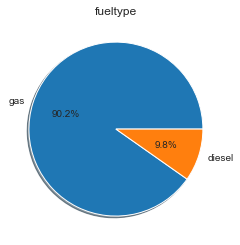

In [13]:
plt.pie(df['fueltype'].value_counts(),shadow=True,autopct = '%.1f%%',labels=['gas','diesel'])
plt.title('fueltype')

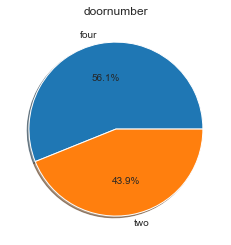

In [14]:
plt.pie(df['doornumber'].value_counts(),shadow=True,autopct = '%.1f%%',labels=['four','two'])
plt.title('doornumber')
plt.show()

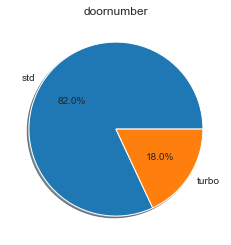

In [15]:
plt.pie(df['aspiration'].value_counts(),shadow=True,autopct = '%.1f%%',labels=['std','turbo'])
plt.title('doornumber')
plt.show()

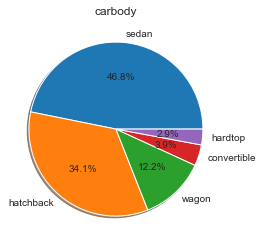

In [16]:
plt.pie(df['carbody'].value_counts(),shadow=True,autopct = '%.1f%%',labels=['sedan', 'hatchback', 'wagon', 'convertible', 'hardtop'])
plt.title('carbody')
plt.show()

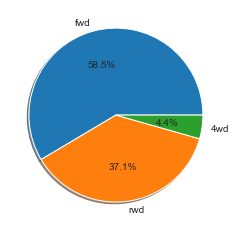

In [17]:
plt.pie(df['drivewheel'].value_counts(),shadow=True,autopct = '%.1f%%',labels=['fwd','rwd','4wd'])
plt.show()

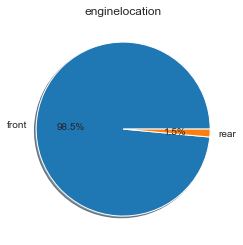

In [18]:
plt.pie(df['enginelocation'].value_counts(),shadow=True,autopct = '%.1f%%',labels=['front','rear'])
plt.title('enginelocation')
plt.show()

In [19]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

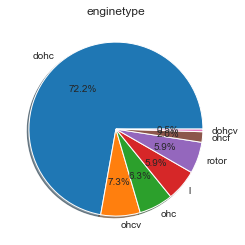

In [20]:
plt.pie(df['enginetype'].value_counts(),shadow=True,autopct = '%.1f%%',labels=['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'])
plt.title('enginetype')
plt.show()

In [21]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

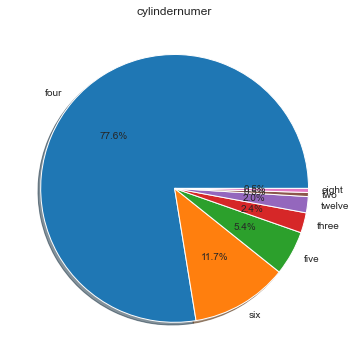

In [68]:
plt.figure(figsize=(6,8))
plt.pie(df['cylindernumber'].value_counts(),shadow=True,autopct = '%.1f%%',labels=['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'])
plt.title('cylindernumer')
plt.show()


In [23]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

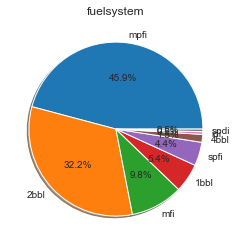

<Figure size 1080x1440 with 0 Axes>

In [24]:
plt.pie(df['fuelsystem'].value_counts(),shadow=True,autopct = '%.1f%%',labels=['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'])
plt.title('fuelsystem')
plt.figure(figsize=(15,20))
plt.show()


# Correlation

Text(0.5, 1.0, 'Correlation ')

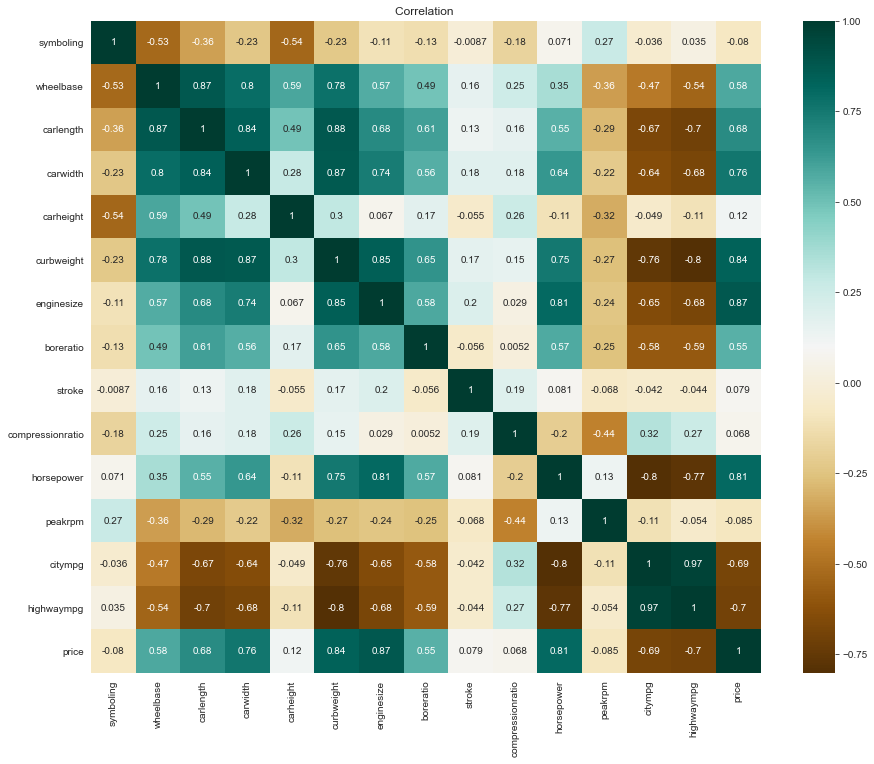

In [25]:
corr=df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='BrBG',annot=True)
r.set_title("Correlation ")

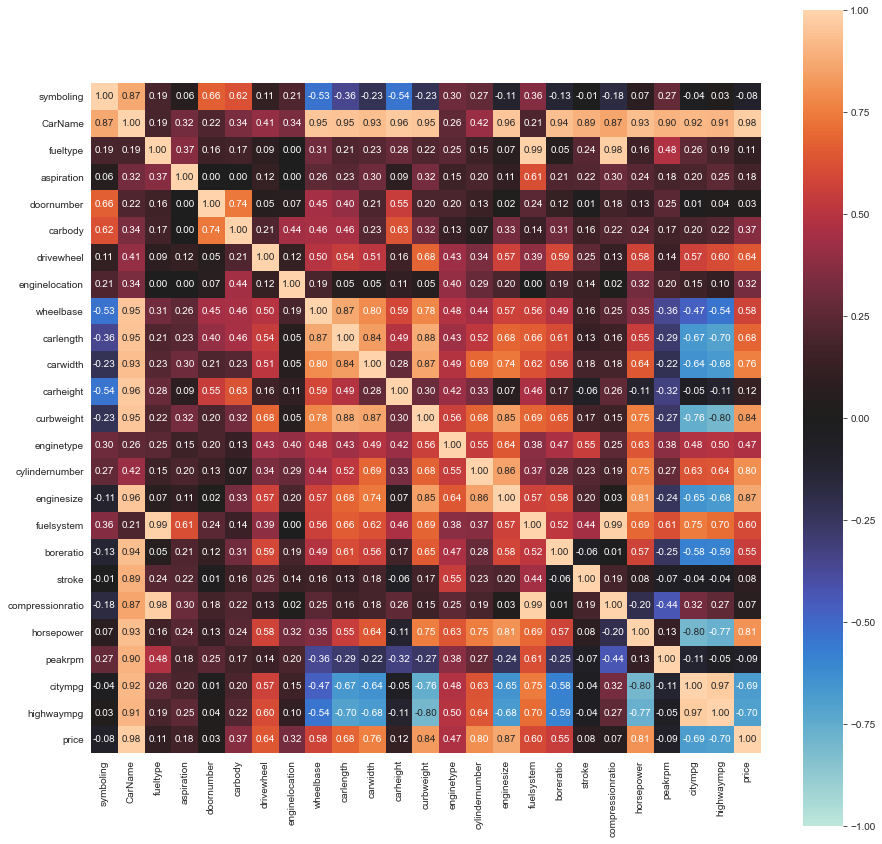

In [26]:
from dython.nominal import associations
associations(df, figsize = (15, 15))
plt.show()

## positive correlation
 - car name and symboling are higly positive correlated with 85%
 -fuel type and compression ratio are positively correlated with 98%
 - fuel type and fuel system are highly correlated with 99%
 - car length and wheel base are positively correlated with 87%
 - carwidth and wheel base are positively correlated with 80%
 - curblength are positively correlated with carwidth and car length.
 - engine size and price are highly are highly correlated.
 - highwaympg and citympg are positively correlated.
 - compression ratio and fuelsystem are 99% positively correlated.
 - cylindernumber and price are correlated
 - curbweight and price are related.
 - carname are mostly correalted with every feature.
 

## negative correlation
- citympg, highwaympg and price are negatively correlated.
- highwaympg and carlength are negatively correlated with 70%.
- citympg, highwaympg and horsepower are negatively correlated with 80%.
- curbweight and highwaympg are negatively correlated with 80%.

### Bivariate

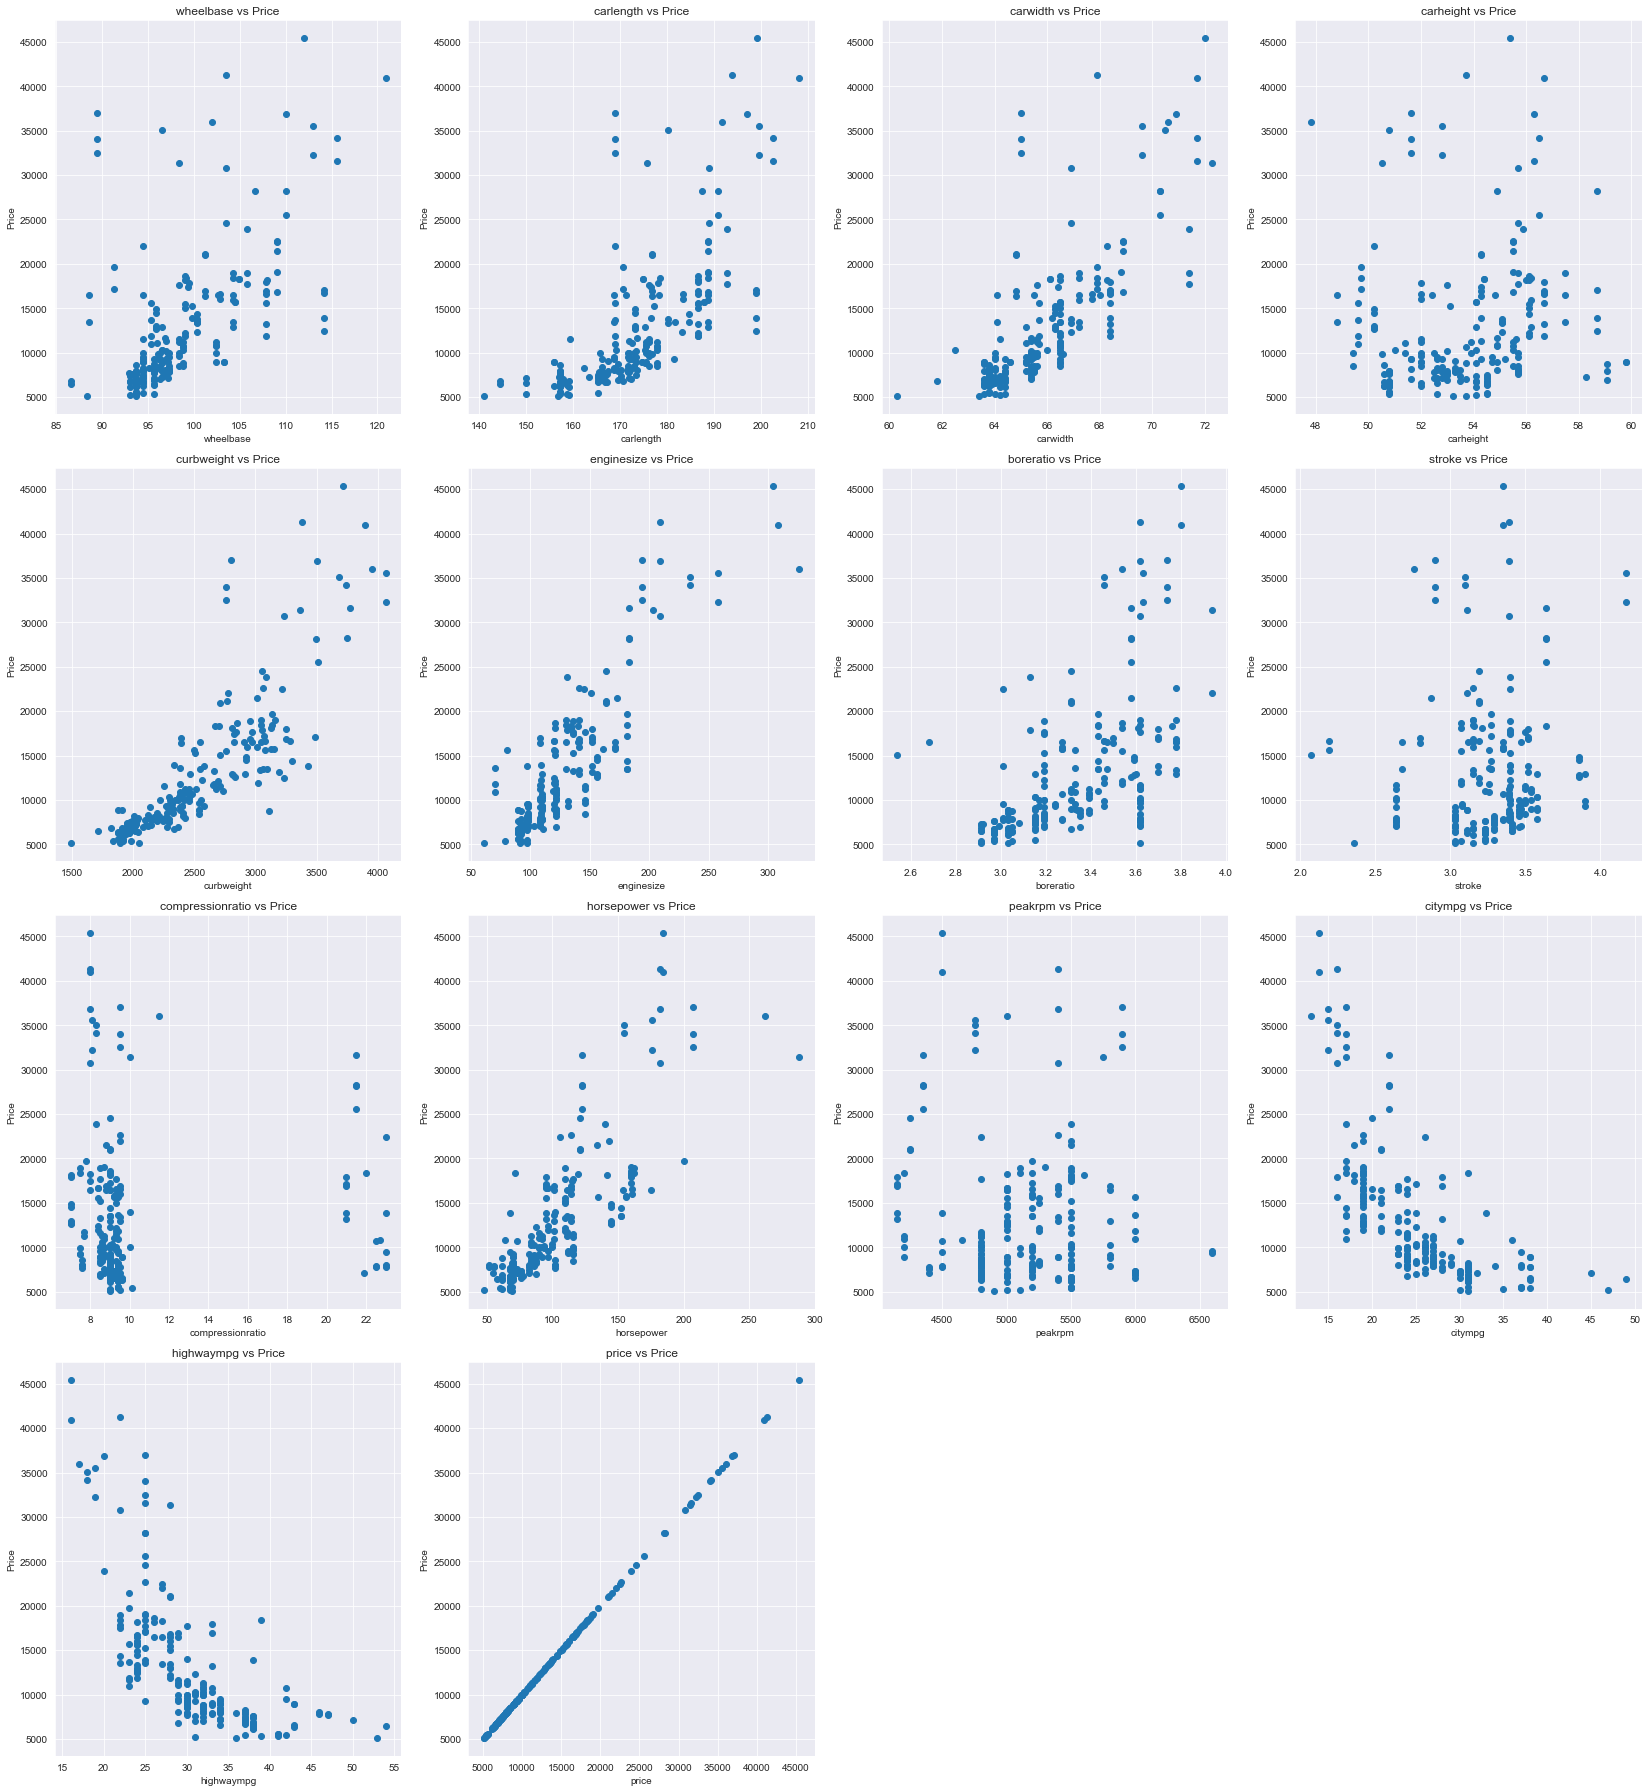

In [27]:
def scatter(x,fig):
    plt.subplot(4,4,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(23,25))

for n,i in enumerate(col):
    scatter(i,n+1)
   
plt.tight_layout()
plt.show()

- The price for std is slightly high

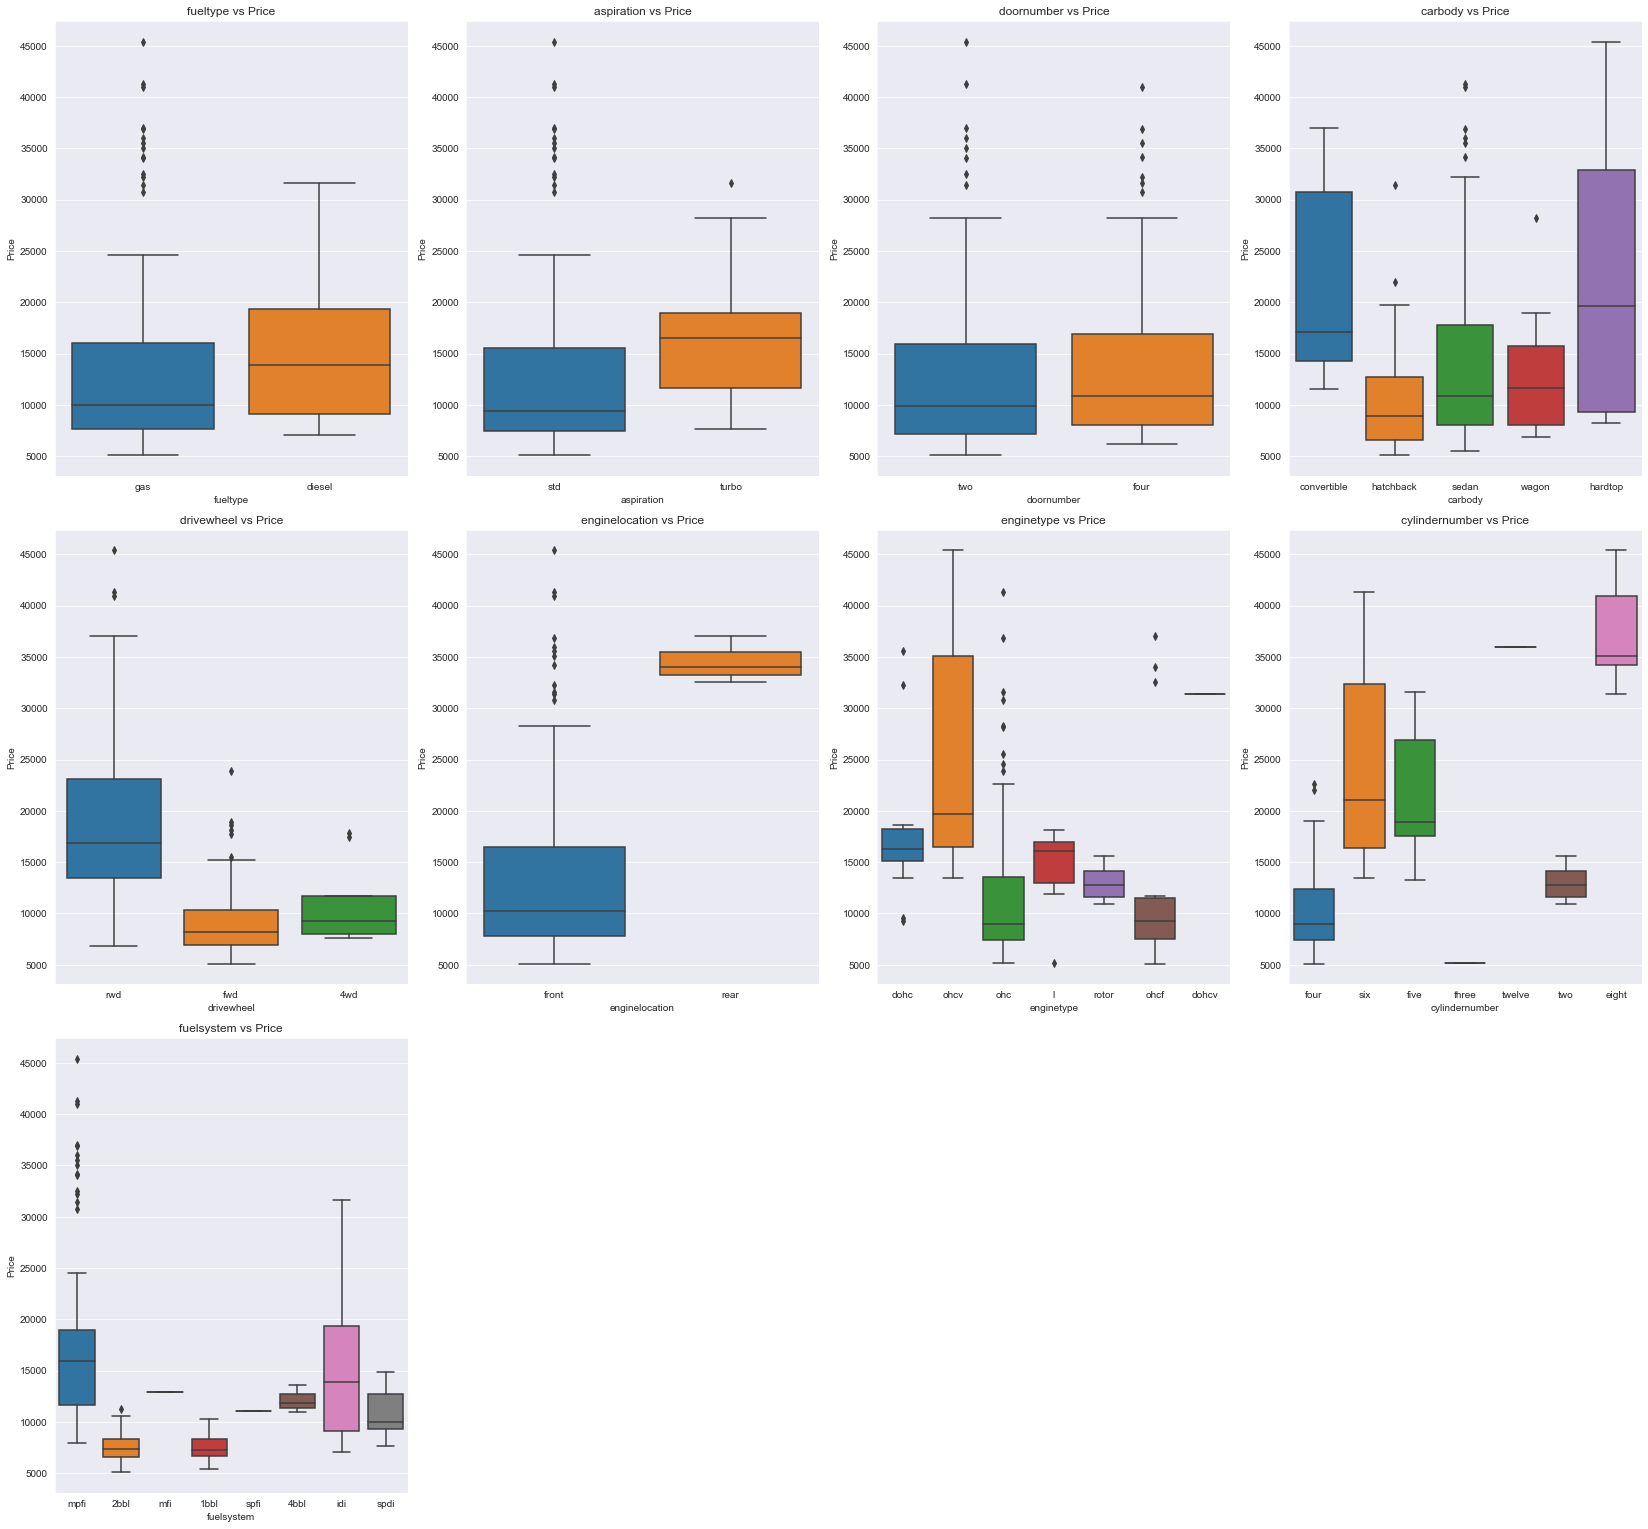

In [28]:
def boxplot(x,fig):
    plt.subplot(4,4,fig)
    sns.boxplot(data=df,x=x,y='price')
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(23,28))

for n,i in enumerate(cate[1:]):
    boxplot(i,n+1)
   
plt.tight_layout()
plt.show()

<Figure size 1224x1440 with 0 Axes>

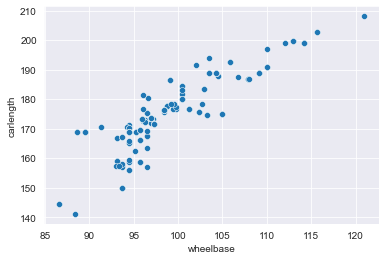

<Figure size 1224x1440 with 0 Axes>

In [29]:
sns.scatterplot(x=df['wheelbase'],y=df['carlength'])
plt.figure(figsize=(17,20))

### 1. As wheelbase size increase,carlength also increase.

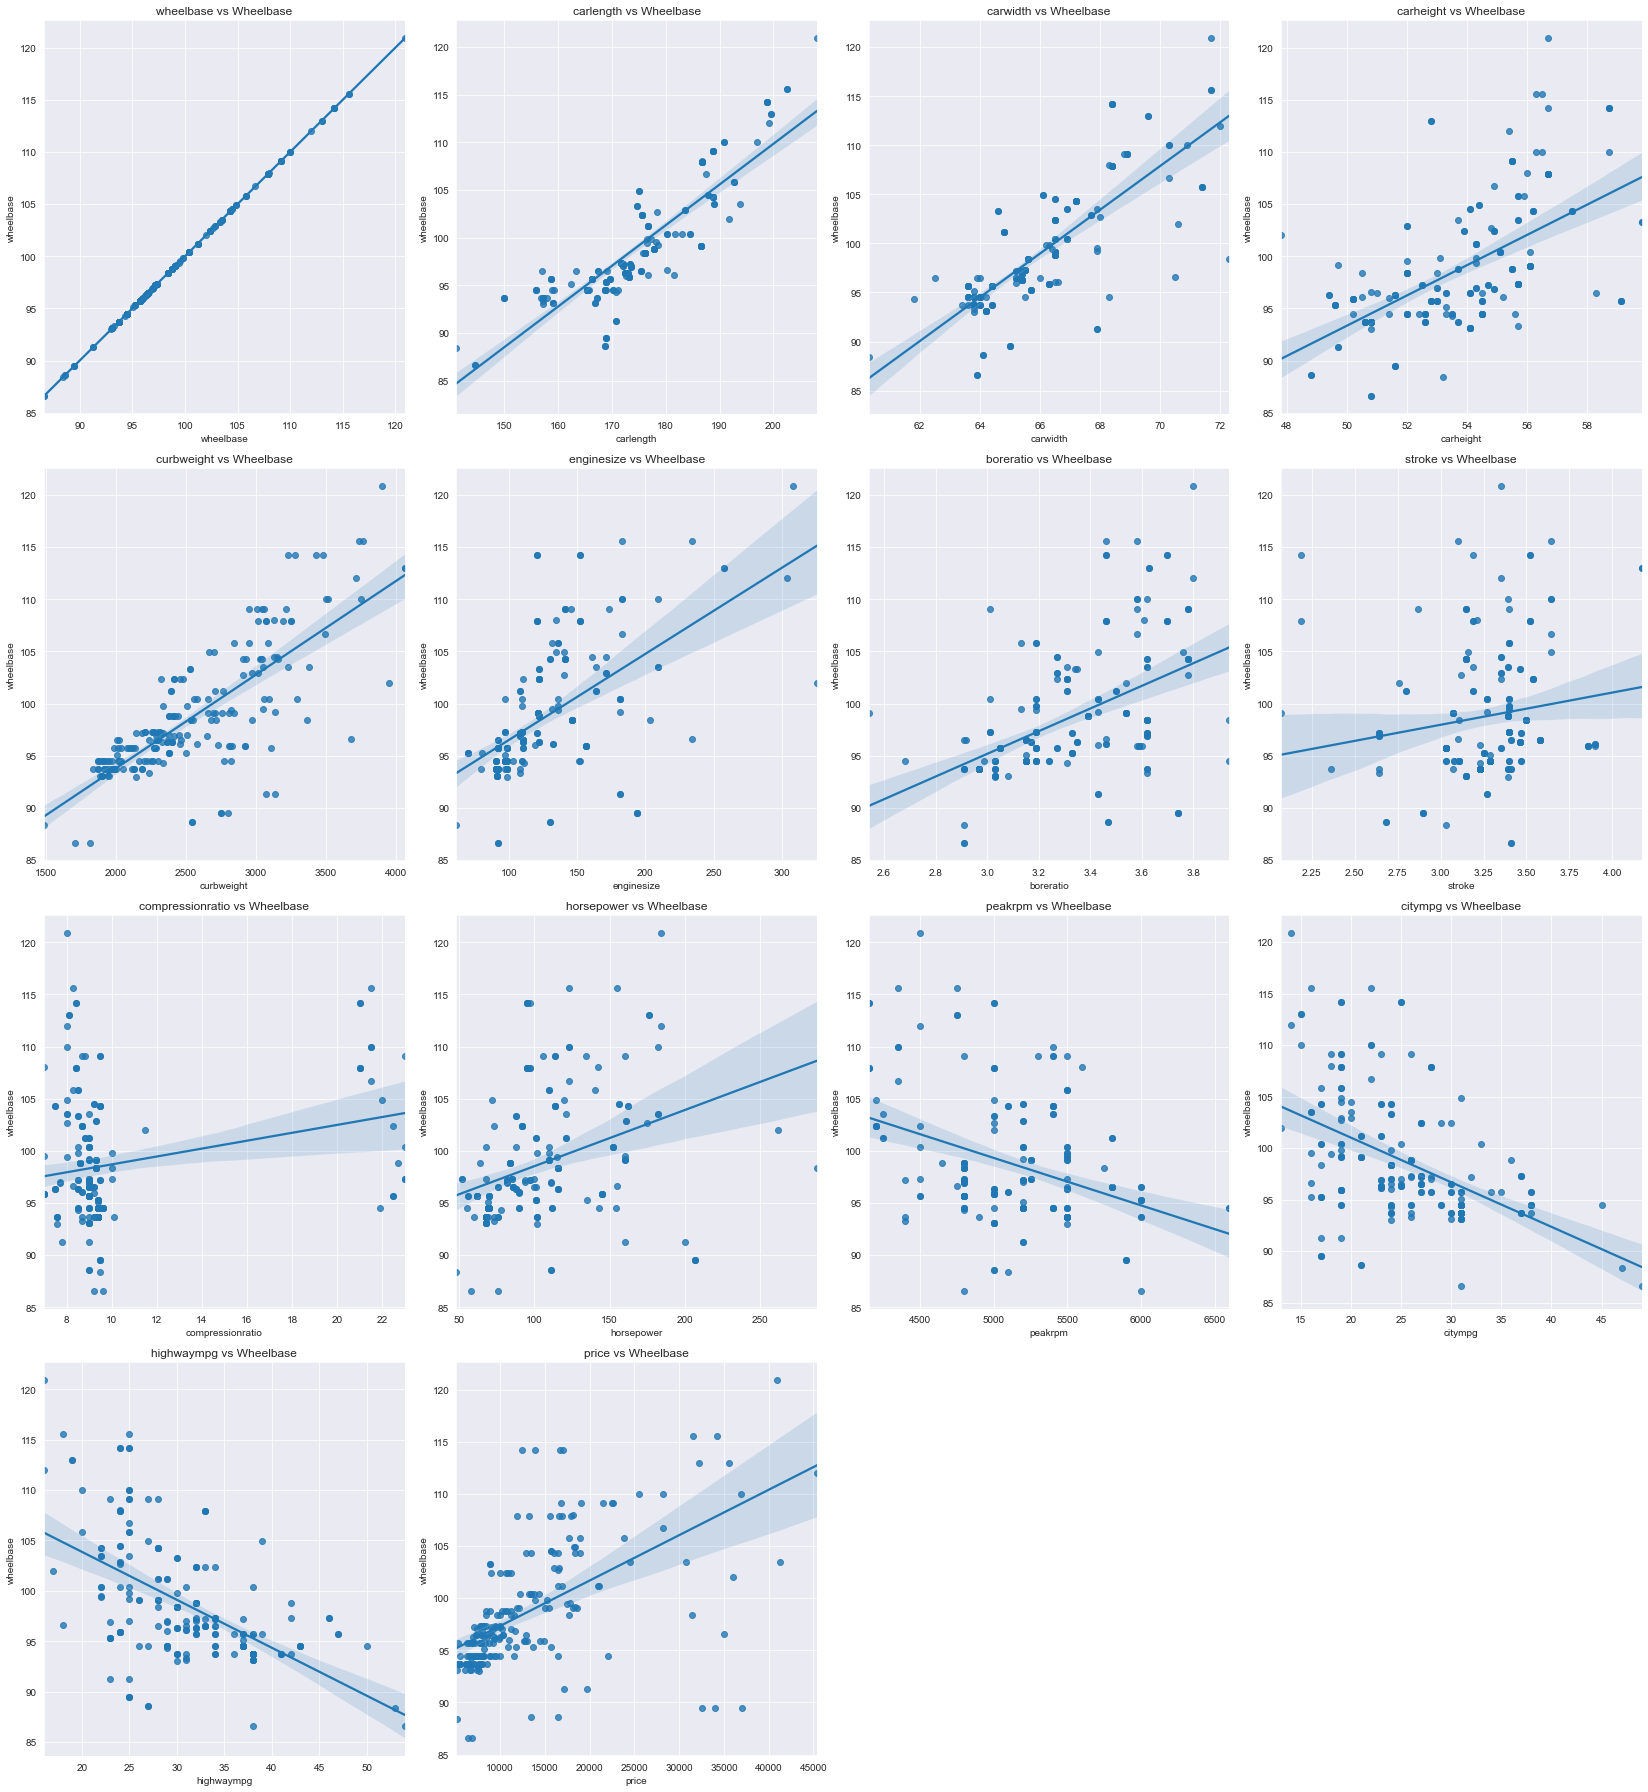

In [30]:
def scatter(x,fig):
    plt.subplot(4,4,fig)
    sns.regplot(df[x],df['wheelbase'])
    plt.title(x+' vs Wheelbase')
    plt.ylabel('wheelbase')
    plt.xlabel(x)

plt.figure(figsize=(23,25))

for n,i in enumerate(col):
    scatter(i,n+1)
   
plt.tight_layout()
plt.show()

In [31]:
col

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

<AxesSubplot: xlabel='carwidth', ylabel='carlength'>

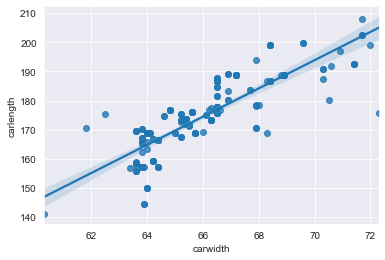

In [32]:
sns.regplot(df['carwidth'],df['carlength'])

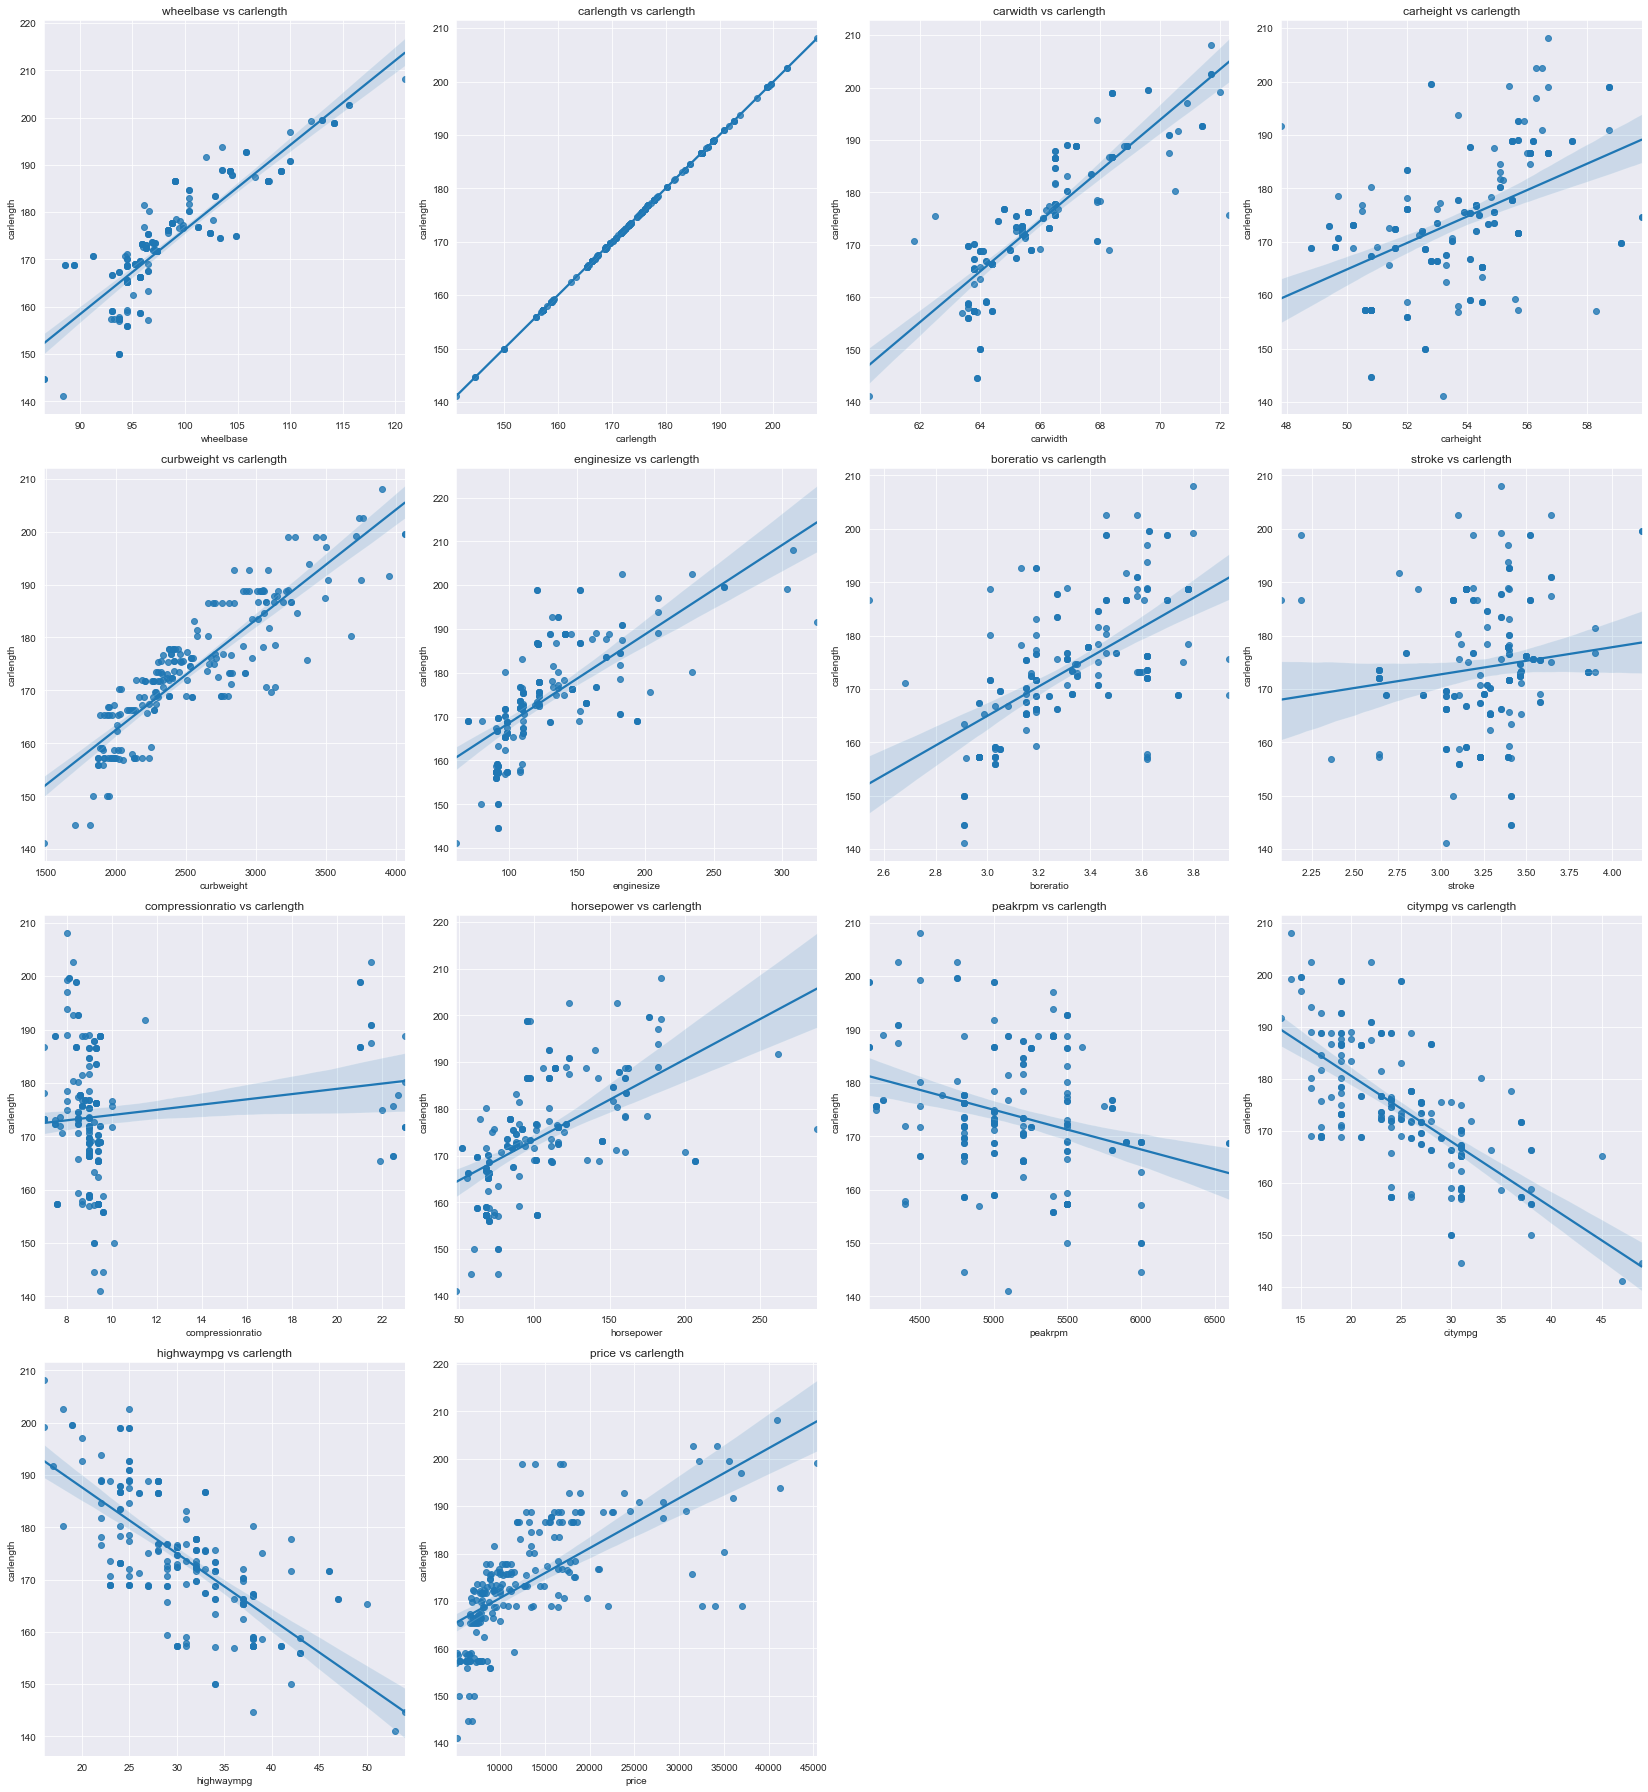

In [33]:
def scatter(x,fig):
    plt.subplot(4,4,fig)
    sns.regplot(df[x],df['carlength'])
    plt.title(x+' vs carlength')
    plt.ylabel('carlength')
    plt.xlabel(x)

plt.figure(figsize=(23,25))

for n,i in enumerate(col):
    scatter(i,n+1)
   
plt.tight_layout()
plt.show()

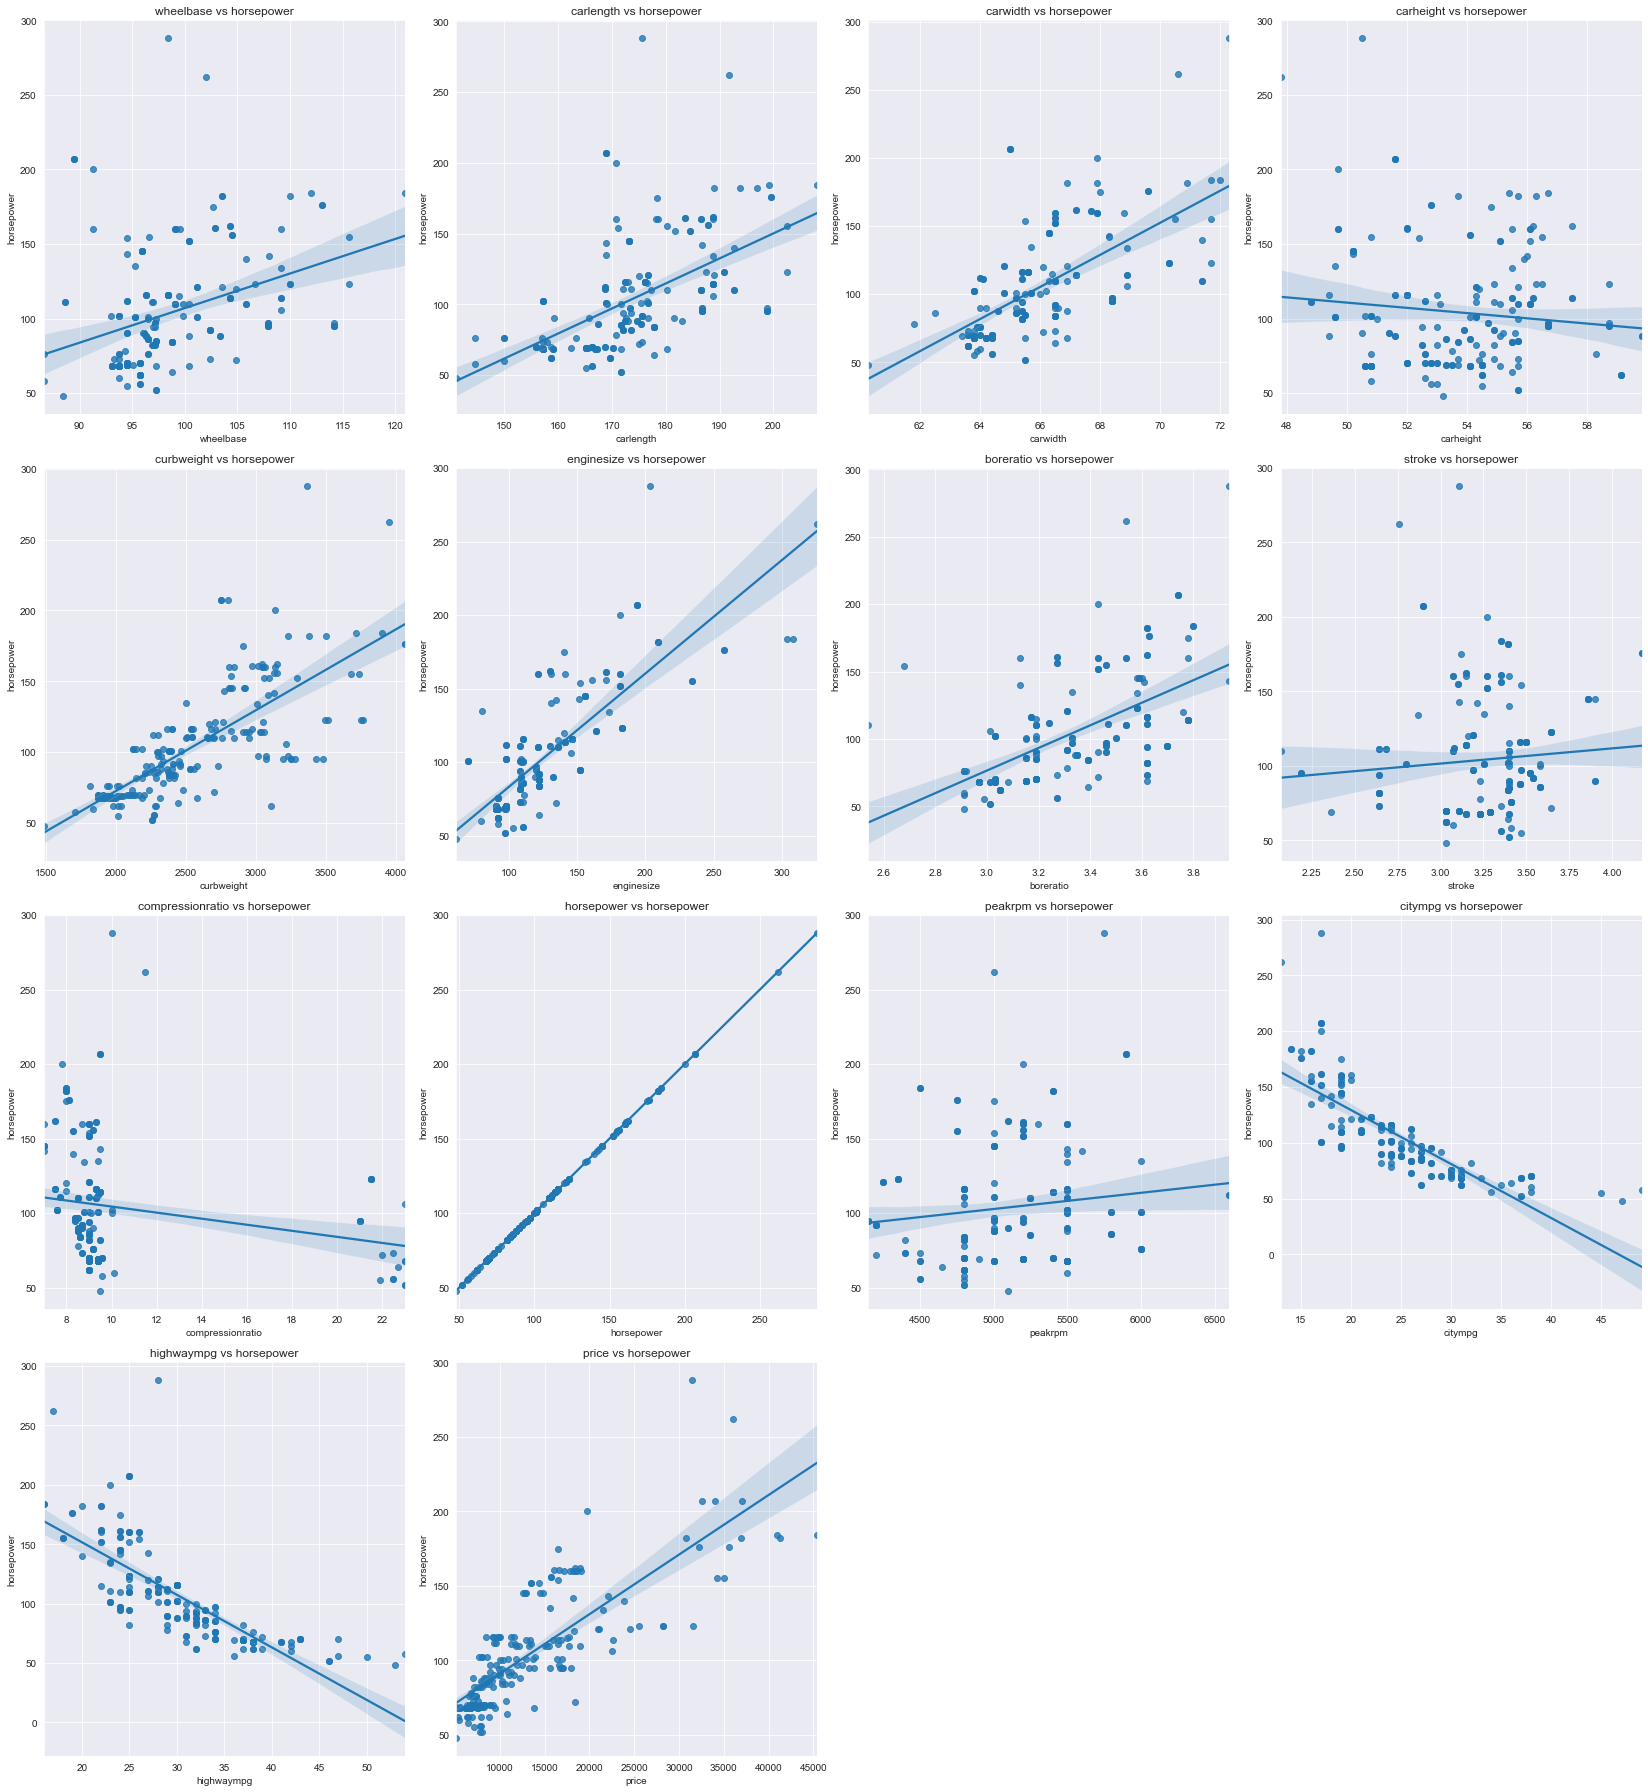

In [34]:
def scatter(x,fig):
    plt.subplot(4,4,fig)
    sns.regplot(df[x],df['horsepower'])
    plt.title(x+' vs horsepower')
    plt.ylabel('horsepower')
    plt.xlabel(x)

plt.figure(figsize=(23,25))

for n,i in enumerate(col):
    scatter(i,n+1)
   
plt.tight_layout()
plt.show()

- enginesize increases horsepower increase
- as horsepower decrease, highway mpg increase as well as citympg increase.


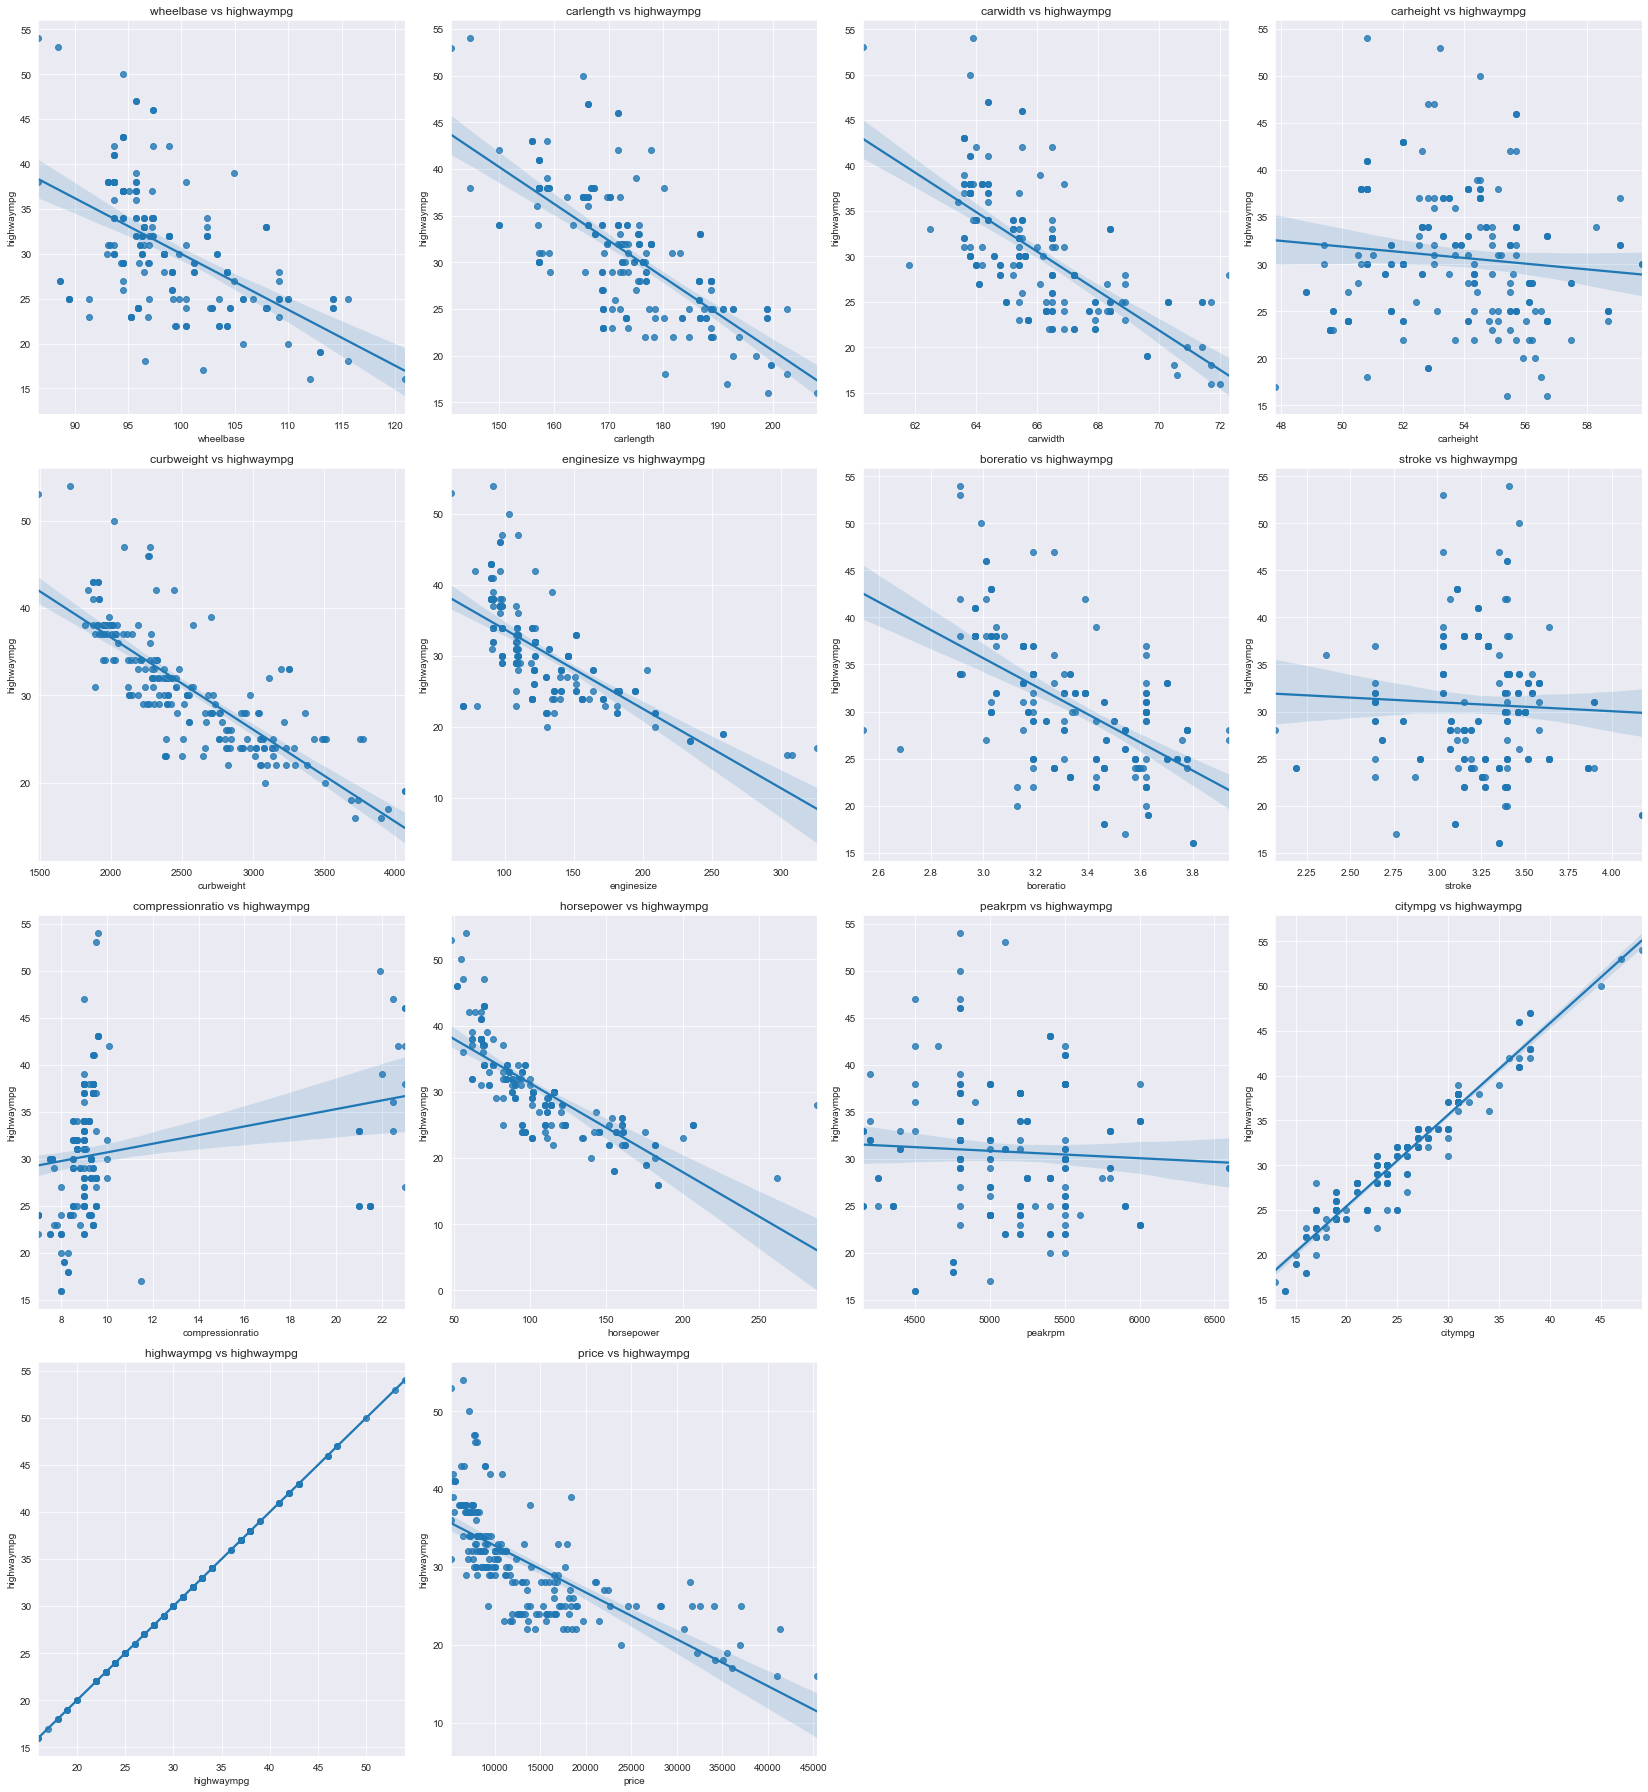

In [35]:
def scatter(x,fig):
    plt.subplot(4,4,fig)
    sns.regplot(df[x],df['highwaympg'])
    plt.title(x+' vs highwaympg')
    plt.ylabel('highwaympg')
    plt.xlabel(x)

plt.figure(figsize=(23,25))

for n,i in enumerate(col):
    scatter(i,n+1)
   
plt.tight_layout()
plt.show()

### as engine size increase, highway mpg decrease

### peakrpm,compressionratio,stroke doesnot show much relation with other features.

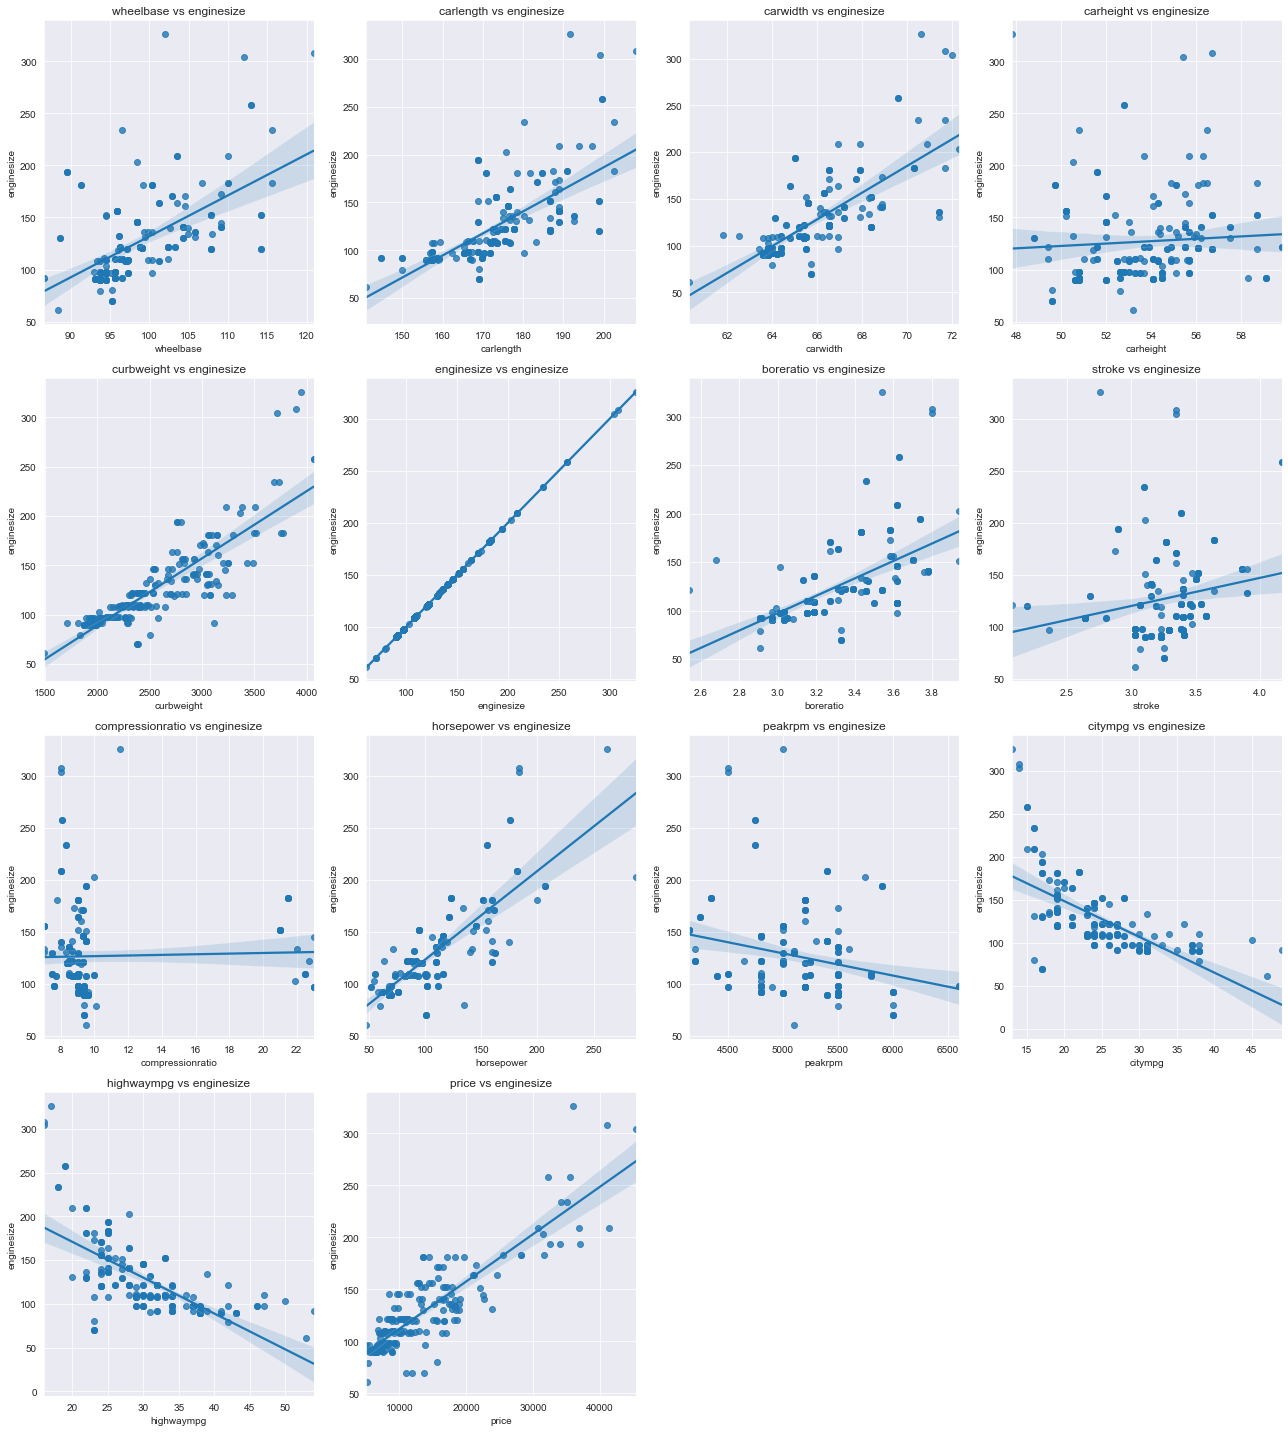

In [36]:
def scatter(x,fig):
    plt.subplot(4,4,fig)
    sns.regplot(df[x],df['enginesize'])
    plt.title(x+' vs enginesize')
    plt.ylabel('enginesize')
    plt.xlabel(x)

plt.figure(figsize=(18,20))

for n,i in enumerate(col):
    scatter(i,n+1)
   
plt.tight_layout()
plt.show()

- if boreratio is high ,then citympg and highwaympg is less.
- if engine is small,horsepower is also less.
- engine size increases,curb weight increases.


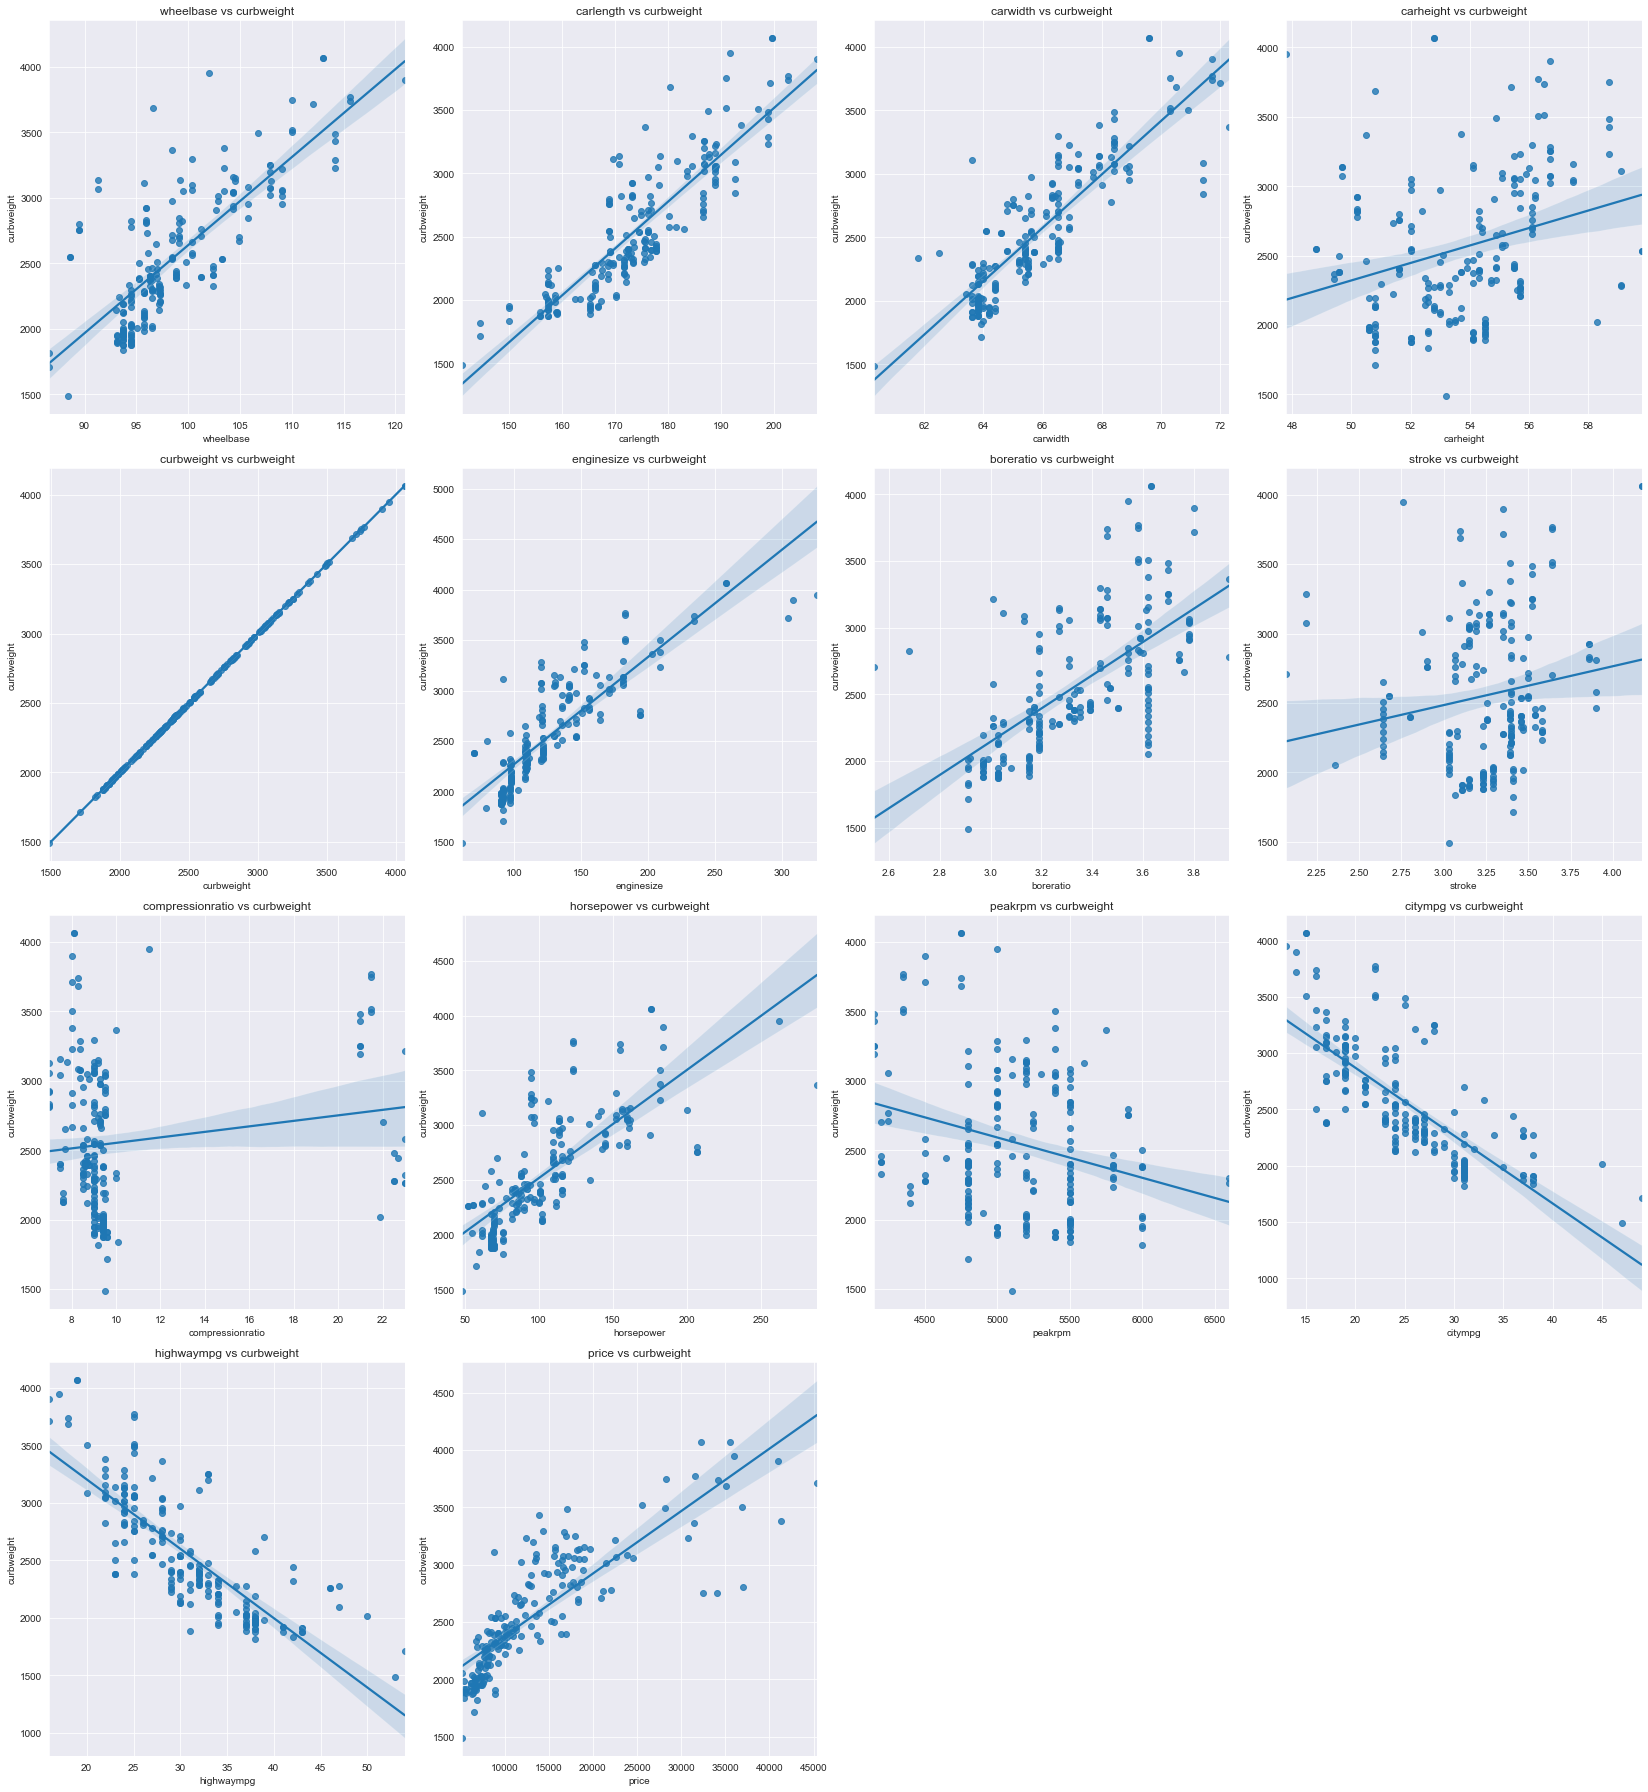

In [37]:
def scatter(x,fig):
    plt.subplot(4,4,fig)
    sns.regplot(df[x],df['curbweight'])
    plt.title(x+' vs curbweight')
    plt.ylabel('curbweight')
    plt.xlabel(x)

plt.figure(figsize=(23,25))

for n,i in enumerate(col):
    scatter(i,n+1)
   
plt.tight_layout()
plt.show()

### highway mpg and city mpg shows negative correlation with every feature.
### curbweight increase with increase in wheelbase,car length,carwidth,horsepower increase.

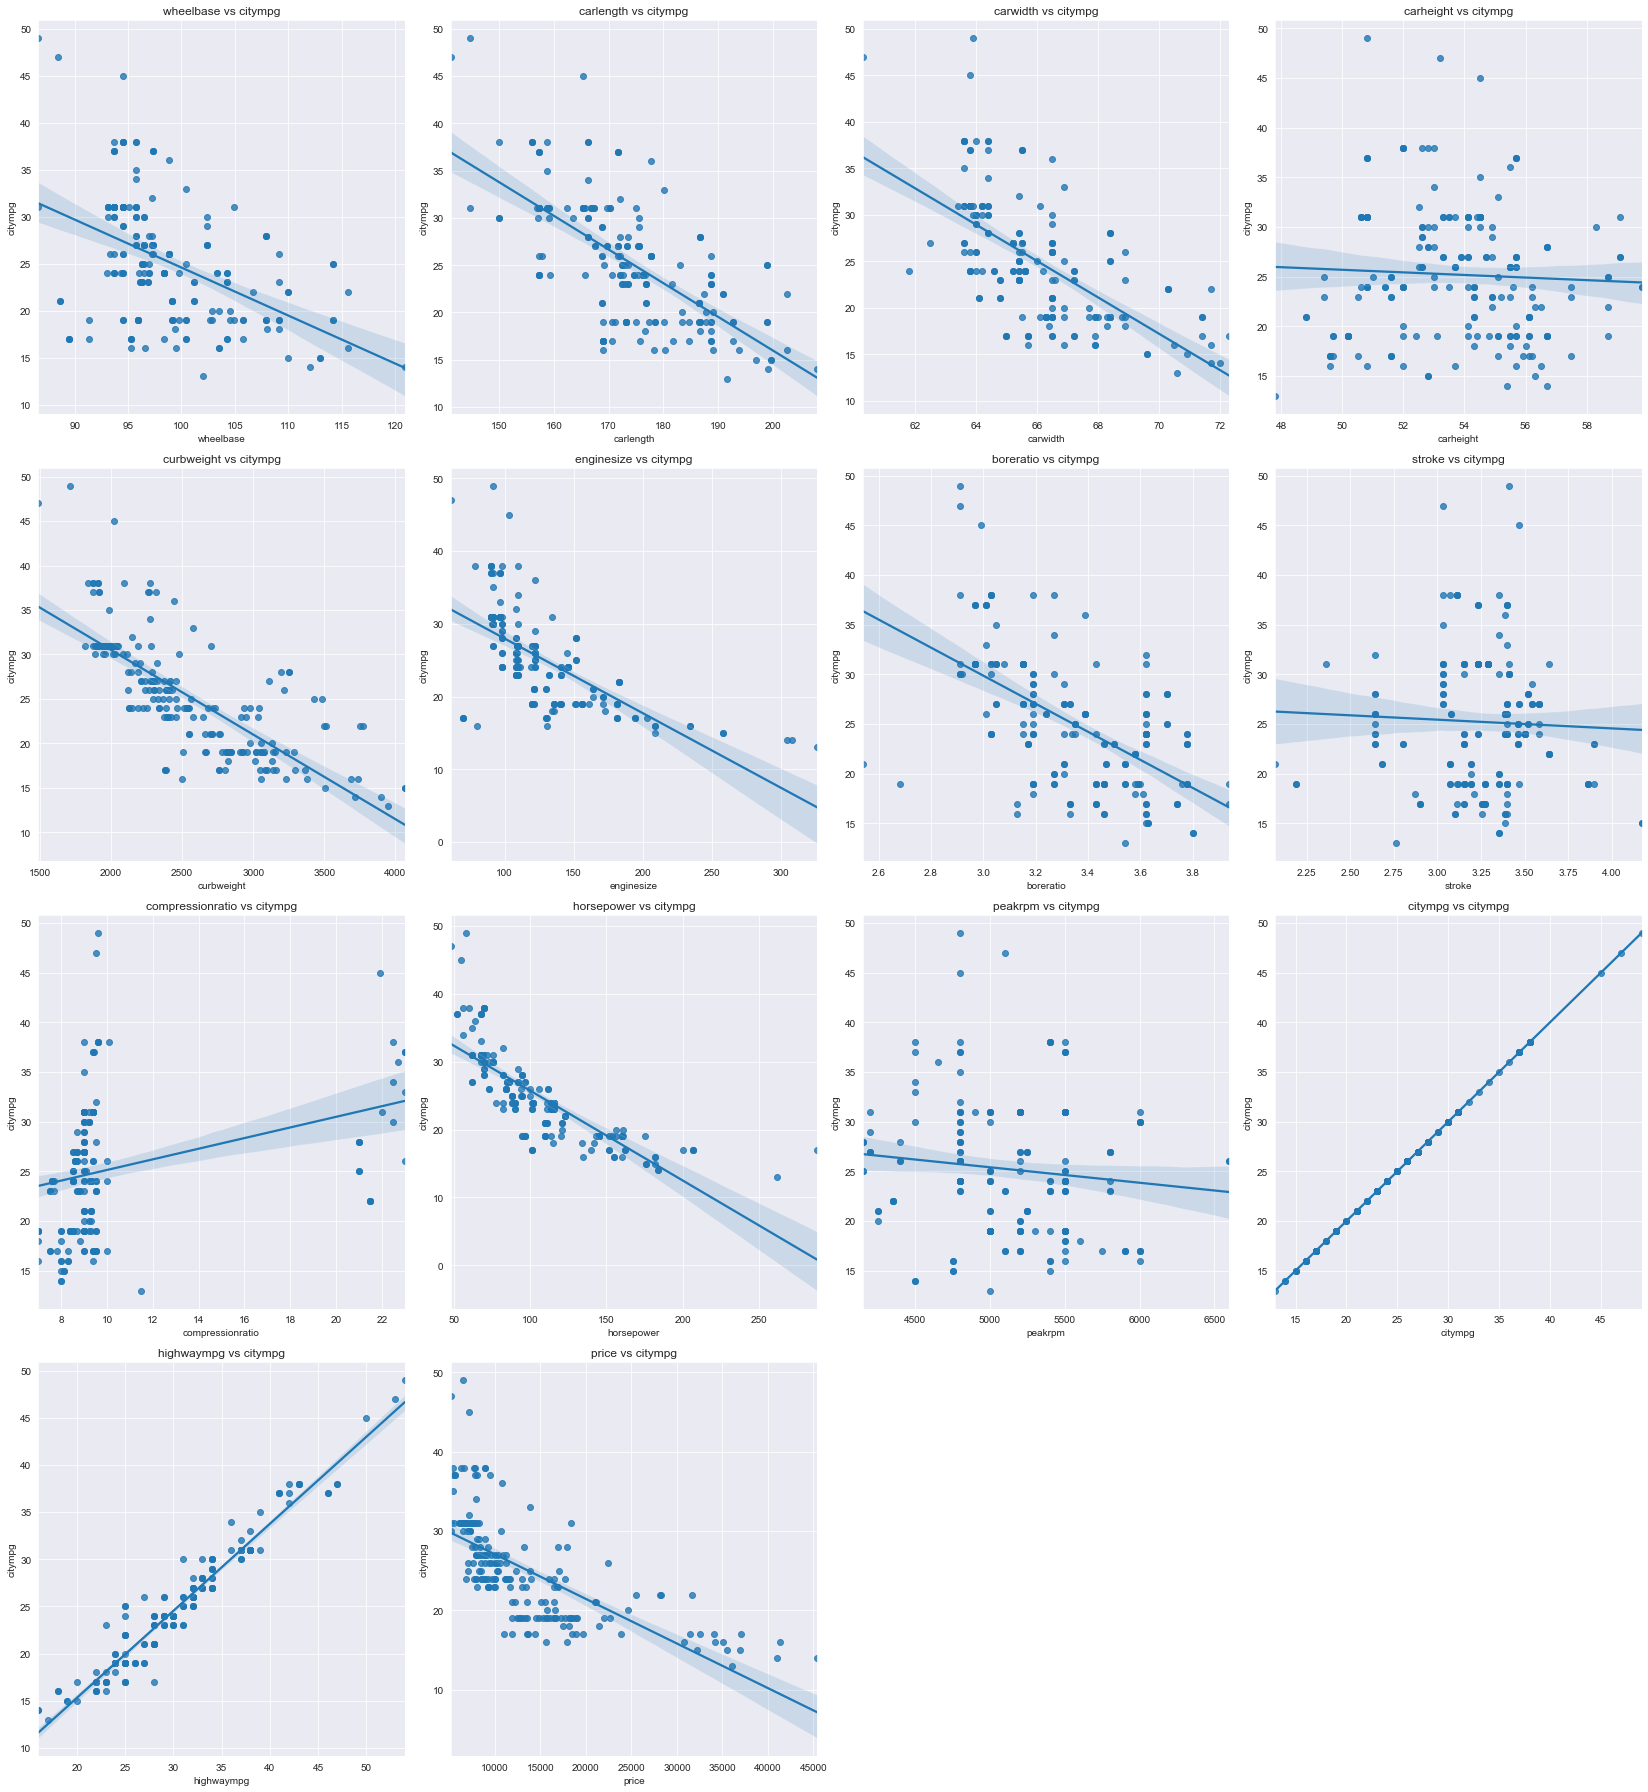

In [38]:
def scatter(x,fig):
    plt.subplot(4,4,fig)
    sns.regplot(df[x],df['citympg'])
    plt.title(x+' vs citympg')
    plt.ylabel('citympg')
    plt.xlabel(x)

plt.figure(figsize=(23,25))

for n,i in enumerate(col):
    scatter(i,n+1)
   
plt.tight_layout()
plt.show()

### citympg shows highly negative correaltion with everyfeature.

<AxesSubplot: xlabel='carwidth', ylabel='carheight'>

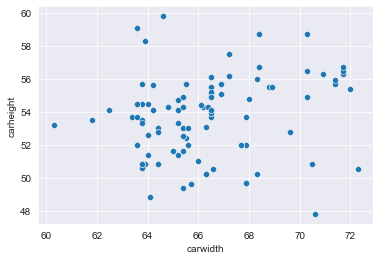

In [39]:
sns.scatterplot(data=df, x="carwidth", y="carheight")

### Multivariate

<AxesSubplot: xlabel='carwidth', ylabel='price'>

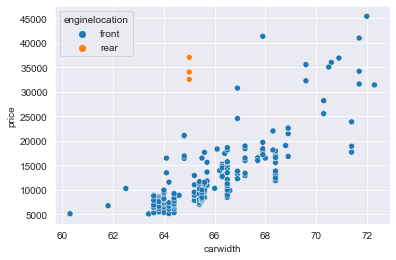

In [40]:
sns.scatterplot(data=df, x="carwidth", y="price",hue='enginelocation')

<AxesSubplot: xlabel='carbody', ylabel='price'>

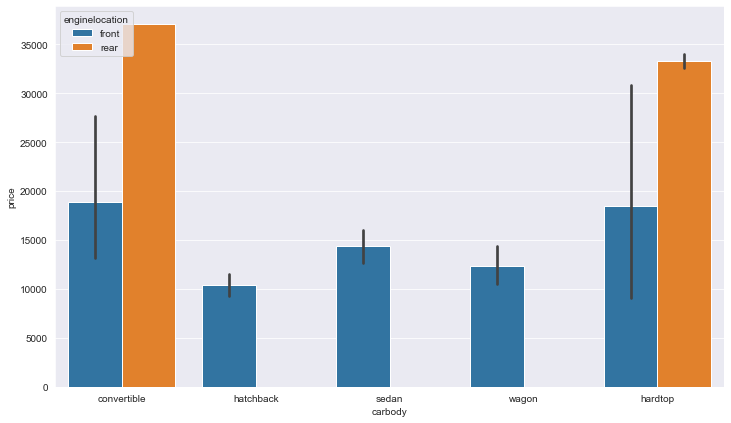

In [41]:
plt.figure(figsize = (12, 7))
sns.barplot(data=df, x="carbody", y="price",hue='enginelocation')

- In sedan,hatchback and wagon engine location is at front.
- Hardtop and convertible carbody have engine at the back ,so it is costly.
- Mostly people buy sedan,hatchback and wagon because it's prize is low.

<AxesSubplot: xlabel='carwidth', ylabel='price'>

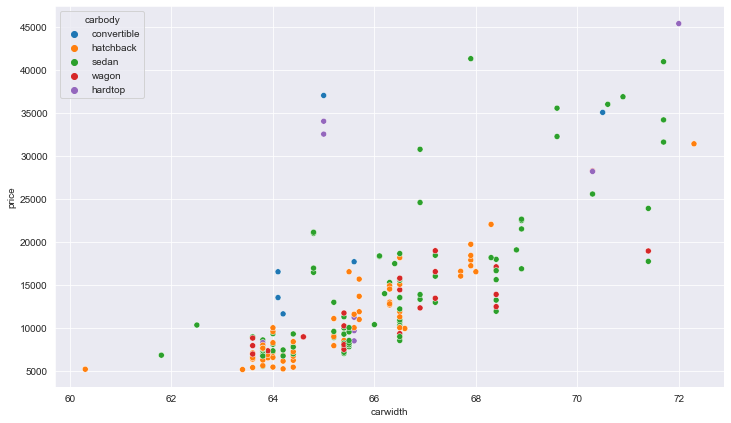

In [42]:
plt.figure(figsize = (12, 7))
sns.scatterplot(data=df, x="carwidth", y="price",hue='carbody')

<AxesSubplot: xlabel='horsepower', ylabel='price'>

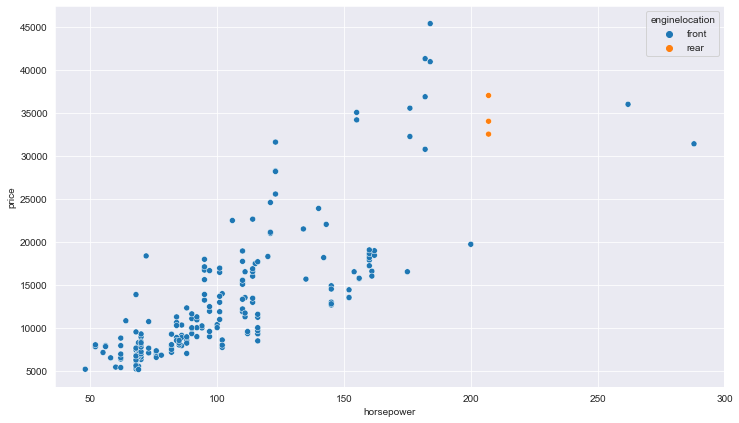

In [43]:
plt.figure(figsize = (12, 7))
sns.scatterplot(data=df, x="horsepower", y="price",hue='enginelocation')

#### Rear enginelocation has high horse power and high price.

<AxesSubplot: xlabel='enginelocation', ylabel='price'>

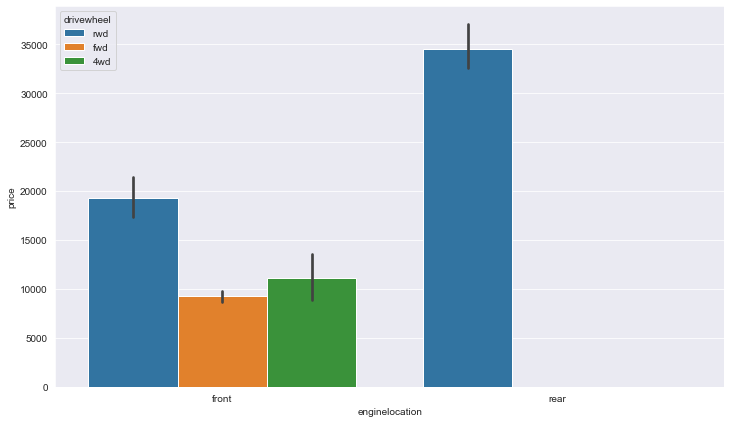

In [44]:
plt.figure(figsize = (12, 7))
sns.barplot(data=df, x="enginelocation", y="price",hue='drivewheel')

<AxesSubplot: xlabel='enginelocation', ylabel='price'>

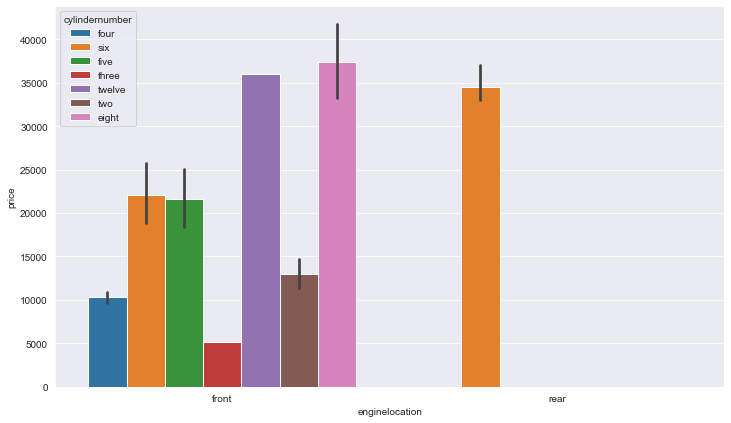

In [45]:
plt.figure(figsize = (12, 7))
sns.barplot(data=df, x="enginelocation", y="price",hue='cylindernumber')

- In rear engine location,six cylinders are there.

<AxesSubplot: xlabel='enginesize', ylabel='horsepower'>

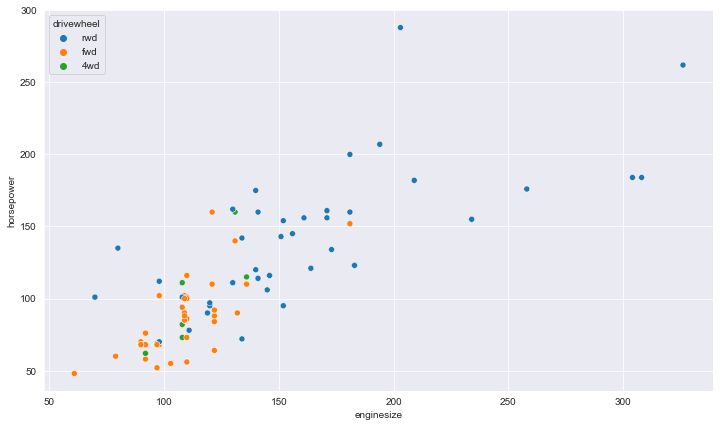

In [46]:
plt.figure(figsize = (12, 7))
sns.scatterplot(data=df, x="enginesize", y="horsepower",hue='drivewheel')

<AxesSubplot: xlabel='citympg', ylabel='price'>

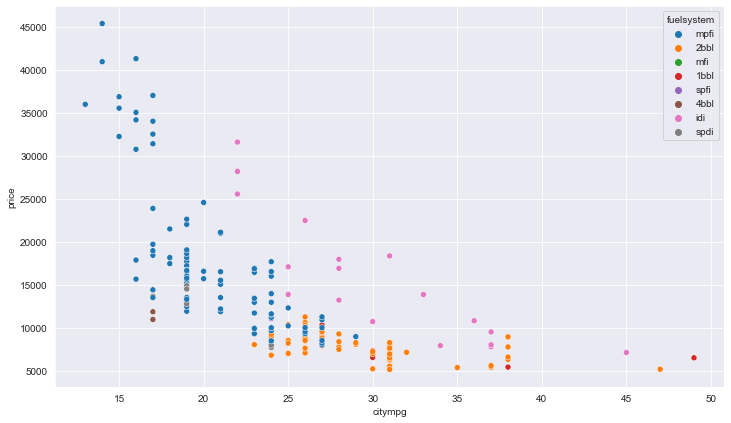

In [47]:
plt.figure(figsize = (12, 7))
sns.scatterplot(data=df, x="citympg", y="price",hue='fuelsystem')

<AxesSubplot: xlabel='citympg', ylabel='price'>

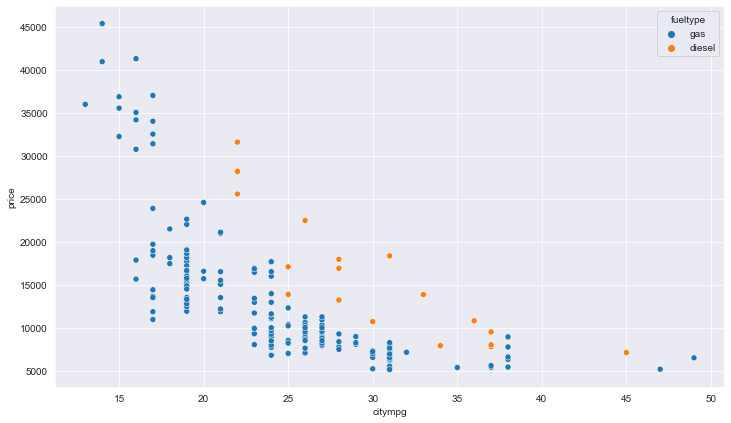

In [48]:
plt.figure(figsize = (12, 7))
sns.scatterplot(data=df, x="citympg", y="price",hue='fueltype')

<AxesSubplot: xlabel='citympg', ylabel='price'>

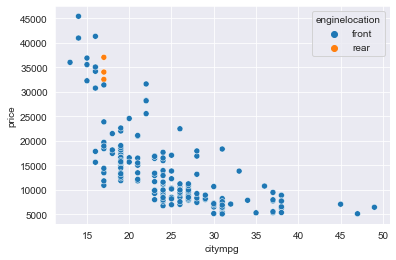

In [49]:
sns.scatterplot(data=df, x="citympg", y="price",hue='enginelocation')

#### front enginelocation have high mileage.

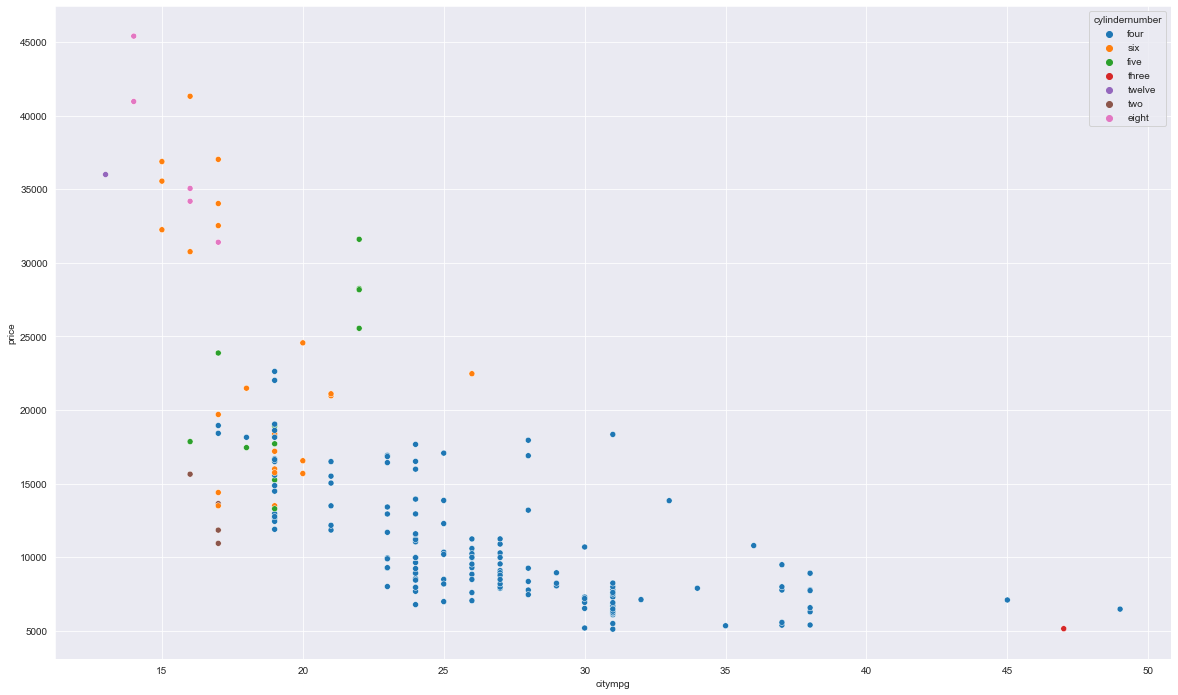

In [50]:
plt.figure(figsize=(20,12))
sns.scatterplot(data=df, x="citympg", y="price",hue='cylindernumber')
plt.show()

## Data Preprocessing

In [51]:
df.drop(columns = ['CarName'], axis = 1, inplace = True)

In [52]:
# encoding ordinal categorical columns

df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})
df['cylindernumber'] = df['cylindernumber'].map({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})

In [53]:
# creating features and label variable

X = df.drop(columns = 'price', axis = 1)
y = df['price']

In [54]:
X = pd.get_dummies(X, drop_first = True)
X.head()

symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
0          3           2       88.6      168.8      64.1       48.8   
1          3           2       88.6      168.8      64.1       48.8   
2          1           2       94.5      171.2      65.5       52.4   
3          2           4       99.8      176.6      66.2       54.3   
4          2           4       99.4      176.6      66.4       54.3   

   curbweight  cylindernumber  enginesize  boreratio  ...  enginetype_ohcf  \
0        2548               4         130       3.47  ...                0   
1        2548               4         130       3.47  ...                0   
2        2823               6         152       2.68  ...                0   
3        2337               4         109       3.19  ...                0   
4        2824               5         136       3.19  ...                0   

   enginetype_ohcv  enginetype_rotor  fuelsystem_2bbl  fuelsystem_4bbl  \
0                0                 0                0                0   
1                0                 0                0                0   
2                1                 0                0                0   
3                0                 0                0                0   
4                0                 0                0                0   

   fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \
0               0               0                1                0   
1               0               0                1                0   
2               0               0                1                0   
3               0               0                1                0   
4               0               0                1                0   

   fuelsystem_spfi  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 38 columns]

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [56]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [57]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test) 


r2_score(y_test,y_pred)

0.7758213608170533

In [58]:
from sklearn.tree import DecisionTreeRegressor


DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train,y_train)
y_predict=DTree.predict(X_test)

r2_score(y_test,y_predict)

0.8650901647945481

In [59]:
## Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(X_train,y_train)
y_predict=RForest.predict(X_test)

r2_score(y_test,y_predict)

0.9119597819521952

In [60]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 200)
xgb.fit(X_train, y_train)
y_predict=xgb.predict(X_test)

r2_score(y_test,y_predict)

0.9056417427454314

In [61]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest','XgBoost'],
    'Score' : [reg.score(X_test, y_test), DTree.score(X_test, y_test), RForest.score(X_test, y_test),xgb.score(X_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)

Model     Score
2      Random Forest  0.911960
3            XgBoost  0.905642
1      Decision Tree  0.865090
0  Linear Regression  0.775821